First, let's import all necessary modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Read the data

In [2]:
# your code here
df = pd.read_csv("data.csv")
df.head()

,Unnamed: 0,user_name,user_location,user_description,user_created,user_followers,date,text,favorites,retweets,is_retweet,category,user_location_updated,user-country_code,user-country
0,0,AARPKY,Bluegrass State,Official AARP Kentucky Twitter. Get to know us...,2009-07-25 15:14:41,3266,2021-02-18 14:12:52,@3rdRetiredTeach See Kentucky's update vaccine...,0,0,False,Positive,Bluegrass State,USA,United States
1,1,GoSolar01,NaN,"Get all your solar info here, including latest...",2017-12-14 06:26:39,1861,2021-02-18 05:35:56,RT @dr_hhq: Chipped - #crushcovid #gettheshot ...,0,1,True,Positive,NaN,NaN,NaN
2,2,dr_hhq,"Karachi, Pakistan",Assistant Professor #Urology #SIUT - Half Prof...,2009-08-15 06:11:55,2378,2021-02-18 05:35:37,Chipped - #crushcovid #gettheshot 🇨🇳#covid #co...,2,1,True,Positive,"Karachi, Pakistan",PAK,Pakistan
3,3,Nakhasi_MD,"Los Angeles, CA",Doc in Compton | Policy Adviser. LA County Dep...,2009-03-11 06:04:06,2205,2021-02-18 03:58:45,"RT @PinnacleTC_Hope: Holly Broce, president of...",0,1,True,Positive,"Los Angeles, CA",USA,United States
4,4,SonLaurencio,"Kentucky, USA",Pro Executive Entrepreneur #business #marketin...,2013-04-15 02:31:40,1558,2021-02-18 03:48:33,RT @LFCHD: A COVID-19 vaccine update thread:\n...,0,1,True,Positive,"Kentucky, USA",USA,United States


In [3]:
df.drop(['Unnamed: 0'], axis =1, inplace = True)

In [4]:
df.shape

(36696, 14)

There are 11 columns and 18491 rows. (we deleted the 2 columns because of irrelevance)

# Present summary statistics

In [5]:
df.describe()

,user_followers,favorites,retweets
count,3.669600e+04,36696.000000,36696.000000
mean,6.813570e+03,2.785971,85.690429
std,9.450024e+04,22.436390,720.188548
min,0.000000e+00,0.000000,0.000000
25%,1.490000e+02,0.000000,0.000000
50%,6.100000e+02,0.000000,3.000000
75%,2.238000e+03,0.000000,16.000000
max,8.623795e+06,1318.000000,25838.000000


# Present datatype per column

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36696 entries, 0 to 36695
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   user_name              36696 non-null  object
 1   user_location          26430 non-null  object
 2   user_description       32793 non-null  object
 3   user_created           36696 non-null  object
 4   user_followers         36696 non-null  int64 
 5   date                   36696 non-null  object
 6   text                   36696 non-null  object
 7   favorites              36696 non-null  int64 
 8   retweets               36696 non-null  int64 
 9   is_retweet             36696 non-null  bool  
 10  category               36696 non-null  object
 11  user_location_updated  26235 non-null  object
 12  user-country_code      15116 non-null  object
 13  user-country           15116 non-null  object
dtypes: bool(1), int64(3), object(10)
memory usage: 3.7+ MB


# Present columns with NA

In [7]:
column_with_nulls = np.array(df.columns[df.isnull().any()])
column_with_nulls

array(['user_location', 'user_description', 'user_location_updated',
       'user-country_code', 'user-country'], dtype=object)

### Perform data integrity checks

Tweets length is more than 0

In [8]:
assert df['text'].str.len().all() > 0

Only 2 categories, Negative and positive

In [9]:
df['category'].value_counts()

Negative    19252
Positive    17444
Name: category, dtype: int64

# Define the variables

In [10]:
target = 'category'
df.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'date', 'text', 'favorites', 'retweets', 'is_retweet',
       'category', 'user_location_updated', 'user-country_code',
       'user-country'],
      dtype='object')

**Categorical:**\
user_name\
user_location\
user_description\
user_created\
date\
text\
is_retweet

**Numerical:**\
user_followers
favorites\
retweets


# Dates

In [11]:
df['user_created'] = pd.to_datetime(df['user_created'], errors = 'coerce')
# Let's check the type of each distinct value
df['user_created'].apply(type).value_counts()

<class 'pandas._libs.tslibs.timestamps.Timestamp'>    36696
Name: user_created, dtype: int64

**GOOD!**

In [12]:
df['date'] = pd.to_datetime(df['date'], errors = 'coerce')
# Let's check the type of each distinct value
df['date'].apply(type).value_counts()

<class 'pandas._libs.tslibs.timestamps.Timestamp'>    36696
Name: date, dtype: int64

**GOOD!**

# Spliting the data

## Prepare data

In [13]:
# Let's prepare our data :
features = [feature for feature in df.columns if feature != target]

relevant_df = df[features + [target]].drop_duplicates() # making sure to drop duplicated rows
relevant_df.shape # check the shape

(19039, 14)

In [14]:
X = relevant_df[features] 
y = relevant_df[target] 

#### Perform split

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, \
                                                    random_state=42, \
                                    stratify = relevant_df[target])

#### Check the validity of our split

In [16]:
print(X_train.shape[0]/len(relevant_df), X_test.shape[0]/len(relevant_df)) # proportion train / test for the split
print(set(X_train.index) & set(X_test.index)) # are train and test datasets overlapping ? 

0.7999894952465991 0.2000105047534009
set()


#### Prepare train and test datasets for the next steps

In [17]:
train_df = pd.concat([X_train[features], y_train], axis=1)

In [18]:
test_df = pd.concat([X_test[features], y_test], axis =1)

# Missing NA's

#### Missing values - train dataset

In [19]:
column_with_nulls = np.array(train_df.columns[train_df.isnull().any()])
{col : train_df[col].isnull().sum() for col in column_with_nulls}

{'user_location': 3690,
 'user_description': 1547,
 'user_location_updated': 3767,
 'user-country_code': 8931,
 'user-country': 8931}

In [20]:
train_df[pd.isnull(train_df).any(axis=1)]

,user_name,user_location,user_description,user_created,user_followers,date,text,favorites,retweets,is_retweet,user_location_updated,user-country_code,user-country,category
32081,aufreedom,NaN,"Show tune singing, wine drinkin' gal.",2013-08-24 19:27:55,313,2021-01-22 15:39:26,RT @drdanlevy29: #callyourpediatrician #vaccin...,0,36,True,NaN,NaN,NaN,Positive
30346,DanaB42,NaN,NaN,2012-02-13 02:01:20,20,2021-01-22 02:06:34,"RT @webco_atc: Mrs. Fran Floyd, Business Instr...",0,8,True,NaN,NaN,NaN,Positive
32958,waf529,NaN,The Left call me Right wing.\nThe Right call m...,2013-02-09 21:36:15,1735,2021-01-17 16:52:06,RT @DeniseVFriend: @henchy01 @_Dave_Morris_ @c...,0,1,True,NaN,NaN,NaN,Negative
36065,cllrnickevans,Chepstow,@welshconserv Senedd candidate for South Wales...,2016-08-18 13:17:51,423,2021-01-22 07:51:17,RT @mariannaspring: There are growing concerns...,0,100,True,Chepstow,NaN,NaN,Negative
2175,rashenanigans,NaN,. \nYour favorite bisexual Film student\n\n\n\...,2020-03-13 09:11:36,1596,2021-02-16 23:08:04,RT @b_diddy_: And here's a vaccination pic of ...,0,17,True,NaN,NaN,NaN,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8822,crabb_vicki,NaN,Epidemiologist. PhD candidate. Nurse in a prev...,2018-10-22 14:51:29,3753,2021-02-16 19:07:08,RT @ashes785: #phcfactcheck \n\nRepresentative...,0,4,True,NaN,NaN,NaN,Negative
31851,Mandypop15,"Aru, DRC and Boston",Speech pathologist. Founder: Friends of CERBC....,2014-02-08 22:59:29,141,2021-01-22 19:39:59,Baby how you feeling? Feelin good as hell! Par...,1,0,False,"Aru, DRC and Boston",NaN,NaN,Positive
36587,WorkTheTrade1,USA,Investment stuff from others. Want to learn; ...,2019-01-13 20:08:23,339,2021-01-21 16:54:53,RT @NickHudsonCT: Raising conflicts of interes...,0,1759,True,USA,NaN,NaN,Negative
29262,FarheenQurashi,"Baltimore, MD","(She/Her) Trauma/Critical Care Surgeon. Wife, ...",2020-08-03 12:37:00,108,2021-01-23 04:29:36,I’m going to post this informative thread and ...,7,2,True,"Baltimore, MD",NaN,NaN,Positive


In [21]:
#train_df = train_df.drop(69) # delete row 69

There are too many NaNs to delete them.
I think that the best solution for the NaNs is to fill by 'other'.

In [22]:
train_df.user_description.fillna('other', inplace=True)
train_df.user_location.fillna('other', inplace=True)

In [23]:
train_df[pd.isnull(train_df).any(axis=1)] # check that there are no more null values

,user_name,user_location,user_description,user_created,user_followers,date,text,favorites,retweets,is_retweet,user_location_updated,user-country_code,user-country,category
32081,aufreedom,other,"Show tune singing, wine drinkin' gal.",2013-08-24 19:27:55,313,2021-01-22 15:39:26,RT @drdanlevy29: #callyourpediatrician #vaccin...,0,36,True,NaN,NaN,NaN,Positive
30346,DanaB42,other,other,2012-02-13 02:01:20,20,2021-01-22 02:06:34,"RT @webco_atc: Mrs. Fran Floyd, Business Instr...",0,8,True,NaN,NaN,NaN,Positive
32958,waf529,other,The Left call me Right wing.\nThe Right call m...,2013-02-09 21:36:15,1735,2021-01-17 16:52:06,RT @DeniseVFriend: @henchy01 @_Dave_Morris_ @c...,0,1,True,NaN,NaN,NaN,Negative
36065,cllrnickevans,Chepstow,@welshconserv Senedd candidate for South Wales...,2016-08-18 13:17:51,423,2021-01-22 07:51:17,RT @mariannaspring: There are growing concerns...,0,100,True,Chepstow,NaN,NaN,Negative
2175,rashenanigans,other,. \nYour favorite bisexual Film student\n\n\n\...,2020-03-13 09:11:36,1596,2021-02-16 23:08:04,RT @b_diddy_: And here's a vaccination pic of ...,0,17,True,NaN,NaN,NaN,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8822,crabb_vicki,other,Epidemiologist. PhD candidate. Nurse in a prev...,2018-10-22 14:51:29,3753,2021-02-16 19:07:08,RT @ashes785: #phcfactcheck \n\nRepresentative...,0,4,True,NaN,NaN,NaN,Negative
31851,Mandypop15,"Aru, DRC and Boston",Speech pathologist. Founder: Friends of CERBC....,2014-02-08 22:59:29,141,2021-01-22 19:39:59,Baby how you feeling? Feelin good as hell! Par...,1,0,False,"Aru, DRC and Boston",NaN,NaN,Positive
36587,WorkTheTrade1,USA,Investment stuff from others. Want to learn; ...,2019-01-13 20:08:23,339,2021-01-21 16:54:53,RT @NickHudsonCT: Raising conflicts of interes...,0,1759,True,USA,NaN,NaN,Negative
29262,FarheenQurashi,"Baltimore, MD","(She/Her) Trauma/Critical Care Surgeon. Wife, ...",2020-08-03 12:37:00,108,2021-01-23 04:29:36,I’m going to post this informative thread and ...,7,2,True,"Baltimore, MD",NaN,NaN,Positive


#### Missing values - test dataset

In [24]:
test_df.user_description.fillna('other', inplace=True)
test_df.user_location.fillna('other', inplace=True)

In [25]:
test_df[pd.isnull(test_df).any(axis=1)]

,user_name,user_location,user_description,user_created,user_followers,date,text,favorites,retweets,is_retweet,user_location_updated,user-country_code,user-country,category
36457,HOBBITZOMBIE,other,general layabout but work a bit & play games a...,2012-12-22 10:18:11,909,2021-01-21 19:38:37,RT @NickHudsonCT: Raising conflicts of interes...,0,1759,True,NaN,NaN,NaN,Negative
5948,KimYuMD,other,"Regional Medical Director, Aledade\nFamily Phy...",2021-01-29 05:26:33,172,2021-02-08 22:54:25,"RT @CKefalas: Hi, America: a reminder tonight’...",0,6,True,NaN,NaN,NaN,Positive
32785,Fertweetssake1,"Sydney, New South Wales",'A nation of sheep will beget a government of ...,2018-10-28 21:39:00,1373,2021-01-20 00:35:54,@GuidoFawkes Implicit in those actions of cour...,1,0,False,"Sydney, New South Wales",NaN,NaN,Negative
2902,NeilWar30077505,other,other,2017-09-13 17:23:10,255,2021-02-16 21:11:38,RT @CPHO_Canada: Its #FlagDay! Today we celebr...,0,95,True,NaN,NaN,NaN,Positive
5996,larson07,other,live and let live-independently,2009-07-01 21:44:36,207,2021-02-08 22:21:21,RT @indyNurseBrian: Had to continue on foot a ...,0,227,True,NaN,NaN,NaN,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29348,AliC314,NYC Metro Area,"I love books, my son & my Bob.\nJedi Wannabe/B...",2011-11-03 17:13:49,115,2021-01-23 01:48:46,@jack @twittersupport Help spread the message ...,0,0,False,NYC Metro Area,NaN,NaN,Positive
32028,ayshamgwt,kebbi,Senior Special Assistant On New Media To The K...,2017-02-05 09:59:35,1824,2021-01-22 16:29:28,RT @MedicaidcfP: The fight against cancer star...,0,8,True,kebbi,NaN,NaN,Positive
10630,raihnhrmli,other,21,2014-08-16 10:51:12,372,2021-02-18 06:53:35,i cant believe i met an antivaxx today 💀💀,0,0,False,NaN,NaN,NaN,Negative
33671,BDavis100,UK 🇬🇧,Is it that time already?,2011-10-24 20:40:03,44,2021-01-21 21:15:00,RT @NickHudsonCT: Raising conflicts of interes...,0,1758,True,UK,NaN,NaN,Negative


# I think the data is too sparse, so I won't delete more observations (outliers).

# Feature engineering

## Train

Assuming that extreme opinion people tweet length will be differet (in amount manners)

In [26]:
train_df['tweet_len'] = train_df.text.str.len()
train_df.head()

,user_name,user_location,user_description,user_created,user_followers,date,text,favorites,retweets,is_retweet,user_location_updated,user-country_code,user-country,category,tweet_len
32081,aufreedom,other,"Show tune singing, wine drinkin' gal.",2013-08-24 19:27:55,313,2021-01-22 15:39:26,RT @drdanlevy29: #callyourpediatrician #vaccin...,0,36,True,NaN,NaN,NaN,Positive,140
30346,DanaB42,other,other,2012-02-13 02:01:20,20,2021-01-22 02:06:34,"RT @webco_atc: Mrs. Fran Floyd, Business Instr...",0,8,True,NaN,NaN,NaN,Positive,140
2007,PakFightsPolio,"Islamabad, Pakistan",The official Twitter account of the Pakistan P...,2010-07-24 00:10:00,12507,2021-02-17 05:23:48,Balochistan: Health Worker Zubaida is committe...,16,14,True,"Islamabad, Pakistan",PAK,Pakistan,Positive,140
32958,waf529,other,The Left call me Right wing.\nThe Right call m...,2013-02-09 21:36:15,1735,2021-01-17 16:52:06,RT @DeniseVFriend: @henchy01 @_Dave_Morris_ @c...,0,1,True,NaN,NaN,NaN,Negative,80
878,NorthPointMpls,"Minneapolis, MN",NorthPoint Health & Wellness Center is a multi...,2017-03-27 14:56:53,386,2021-02-11 00:05:38,"""I got the vaccine to move us one person close...",5,1,True,"Minneapolis, MN",USA,United States,Positive,140


Maybe people with exterme opinions would use more exclamation marks?

In [27]:
train_df["tweet_special chars"] = train_df.apply(lambda p: sum( not q.isalpha() for q in p["text"] ), axis=1)
train_df.head()

,user_name,user_location,user_description,user_created,user_followers,date,text,favorites,retweets,is_retweet,user_location_updated,user-country_code,user-country,category,tweet_len,tweet_special chars
32081,aufreedom,other,"Show tune singing, wine drinkin' gal.",2013-08-24 19:27:55,313,2021-01-22 15:39:26,RT @drdanlevy29: #callyourpediatrician #vaccin...,0,36,True,NaN,NaN,NaN,Positive,140,31
30346,DanaB42,other,other,2012-02-13 02:01:20,20,2021-01-22 02:06:34,"RT @webco_atc: Mrs. Fran Floyd, Business Instr...",0,8,True,NaN,NaN,NaN,Positive,140,35
2007,PakFightsPolio,"Islamabad, Pakistan",The official Twitter account of the Pakistan P...,2010-07-24 00:10:00,12507,2021-02-17 05:23:48,Balochistan: Health Worker Zubaida is committe...,16,14,True,"Islamabad, Pakistan",PAK,Pakistan,Positive,140,26
32958,waf529,other,The Left call me Right wing.\nThe Right call m...,2013-02-09 21:36:15,1735,2021-01-17 16:52:06,RT @DeniseVFriend: @henchy01 @_Dave_Morris_ @c...,0,1,True,NaN,NaN,NaN,Negative,80,20
878,NorthPointMpls,"Minneapolis, MN",NorthPoint Health & Wellness Center is a multi...,2017-03-27 14:56:53,386,2021-02-11 00:05:38,"""I got the vaccine to move us one person close...",5,1,True,"Minneapolis, MN",USA,United States,Positive,140,31


Maybe they tend to tweet in certian days?

In [28]:
train_df['Day_of_week'] = pd.DatetimeIndex(train_df['date']).dayofweek
train_df.head()

,user_name,user_location,user_description,user_created,user_followers,date,text,favorites,retweets,is_retweet,user_location_updated,user-country_code,user-country,category,tweet_len,tweet_special chars,Day_of_week
32081,aufreedom,other,"Show tune singing, wine drinkin' gal.",2013-08-24 19:27:55,313,2021-01-22 15:39:26,RT @drdanlevy29: #callyourpediatrician #vaccin...,0,36,True,NaN,NaN,NaN,Positive,140,31,4
30346,DanaB42,other,other,2012-02-13 02:01:20,20,2021-01-22 02:06:34,"RT @webco_atc: Mrs. Fran Floyd, Business Instr...",0,8,True,NaN,NaN,NaN,Positive,140,35,4
2007,PakFightsPolio,"Islamabad, Pakistan",The official Twitter account of the Pakistan P...,2010-07-24 00:10:00,12507,2021-02-17 05:23:48,Balochistan: Health Worker Zubaida is committe...,16,14,True,"Islamabad, Pakistan",PAK,Pakistan,Positive,140,26,2
32958,waf529,other,The Left call me Right wing.\nThe Right call m...,2013-02-09 21:36:15,1735,2021-01-17 16:52:06,RT @DeniseVFriend: @henchy01 @_Dave_Morris_ @c...,0,1,True,NaN,NaN,NaN,Negative,80,20,6
878,NorthPointMpls,"Minneapolis, MN",NorthPoint Health & Wellness Center is a multi...,2017-03-27 14:56:53,386,2021-02-11 00:05:38,"""I got the vaccine to move us one person close...",5,1,True,"Minneapolis, MN",USA,United States,Positive,140,31,3


The year when the user created - maybe he's a bot?

In [29]:
train_df['Year user created'] = pd.DatetimeIndex(train_df['user_created']).year
train_df.head()

,user_name,user_location,user_description,user_created,user_followers,date,text,favorites,retweets,is_retweet,user_location_updated,user-country_code,user-country,category,tweet_len,tweet_special chars,Day_of_week,Year user created
32081,aufreedom,other,"Show tune singing, wine drinkin' gal.",2013-08-24 19:27:55,313,2021-01-22 15:39:26,RT @drdanlevy29: #callyourpediatrician #vaccin...,0,36,True,NaN,NaN,NaN,Positive,140,31,4,2013
30346,DanaB42,other,other,2012-02-13 02:01:20,20,2021-01-22 02:06:34,"RT @webco_atc: Mrs. Fran Floyd, Business Instr...",0,8,True,NaN,NaN,NaN,Positive,140,35,4,2012
2007,PakFightsPolio,"Islamabad, Pakistan",The official Twitter account of the Pakistan P...,2010-07-24 00:10:00,12507,2021-02-17 05:23:48,Balochistan: Health Worker Zubaida is committe...,16,14,True,"Islamabad, Pakistan",PAK,Pakistan,Positive,140,26,2,2010
32958,waf529,other,The Left call me Right wing.\nThe Right call m...,2013-02-09 21:36:15,1735,2021-01-17 16:52:06,RT @DeniseVFriend: @henchy01 @_Dave_Morris_ @c...,0,1,True,NaN,NaN,NaN,Negative,80,20,6,2013
878,NorthPointMpls,"Minneapolis, MN",NorthPoint Health & Wellness Center is a multi...,2017-03-27 14:56:53,386,2021-02-11 00:05:38,"""I got the vaccine to move us one person close...",5,1,True,"Minneapolis, MN",USA,United States,Positive,140,31,3,2017


Loud expressions in description - a sign?

In [30]:
train_df["desc_special chars"] = train_df.apply(lambda p: sum( not q.isalpha() for q in p["user_description"] ), axis=1)
train_df.head()

,user_name,user_location,user_description,user_created,user_followers,date,text,favorites,retweets,is_retweet,user_location_updated,user-country_code,user-country,category,tweet_len,tweet_special chars,Day_of_week,Year user created,desc_special chars
32081,aufreedom,other,"Show tune singing, wine drinkin' gal.",2013-08-24 19:27:55,313,2021-01-22 15:39:26,RT @drdanlevy29: #callyourpediatrician #vaccin...,0,36,True,NaN,NaN,NaN,Positive,140,31,4,2013,8
30346,DanaB42,other,other,2012-02-13 02:01:20,20,2021-01-22 02:06:34,"RT @webco_atc: Mrs. Fran Floyd, Business Instr...",0,8,True,NaN,NaN,NaN,Positive,140,35,4,2012,0
2007,PakFightsPolio,"Islamabad, Pakistan",The official Twitter account of the Pakistan P...,2010-07-24 00:10:00,12507,2021-02-17 05:23:48,Balochistan: Health Worker Zubaida is committe...,16,14,True,"Islamabad, Pakistan",PAK,Pakistan,Positive,140,26,2,2010,9
32958,waf529,other,The Left call me Right wing.\nThe Right call m...,2013-02-09 21:36:15,1735,2021-01-17 16:52:06,RT @DeniseVFriend: @henchy01 @_Dave_Morris_ @c...,0,1,True,NaN,NaN,NaN,Negative,80,20,6,2013,24
878,NorthPointMpls,"Minneapolis, MN",NorthPoint Health & Wellness Center is a multi...,2017-03-27 14:56:53,386,2021-02-11 00:05:38,"""I got the vaccine to move us one person close...",5,1,True,"Minneapolis, MN",USA,United States,Positive,140,31,3,2017,25


In [31]:
train_df.user_name.value_counts()[:10]
ten_most_common_names = train_df.user_name.value_counts().keys().tolist()[:10]
ten_most_common_names

['Nakhasi_MD',
 'SunshineTheGrey',
 'drkkyu',
 'ThisIsOurShot',
 'Cagsil',
 'NYCHealthSystem',
 'lizditz',
 'doritmi',
 'KimYuMD',
 'DeniseVFriend']

In [32]:
train_df['ten most common names'] = train_df.apply (lambda row: 1 if row.user_name in ten_most_common_names else 0 , axis=1)
train_df.head()

,user_name,user_location,user_description,user_created,user_followers,date,text,favorites,retweets,is_retweet,user_location_updated,user-country_code,user-country,category,tweet_len,tweet_special chars,Day_of_week,Year user created,desc_special chars,ten most common names
32081,aufreedom,other,"Show tune singing, wine drinkin' gal.",2013-08-24 19:27:55,313,2021-01-22 15:39:26,RT @drdanlevy29: #callyourpediatrician #vaccin...,0,36,True,NaN,NaN,NaN,Positive,140,31,4,2013,8,0
30346,DanaB42,other,other,2012-02-13 02:01:20,20,2021-01-22 02:06:34,"RT @webco_atc: Mrs. Fran Floyd, Business Instr...",0,8,True,NaN,NaN,NaN,Positive,140,35,4,2012,0,0
2007,PakFightsPolio,"Islamabad, Pakistan",The official Twitter account of the Pakistan P...,2010-07-24 00:10:00,12507,2021-02-17 05:23:48,Balochistan: Health Worker Zubaida is committe...,16,14,True,"Islamabad, Pakistan",PAK,Pakistan,Positive,140,26,2,2010,9,0
32958,waf529,other,The Left call me Right wing.\nThe Right call m...,2013-02-09 21:36:15,1735,2021-01-17 16:52:06,RT @DeniseVFriend: @henchy01 @_Dave_Morris_ @c...,0,1,True,NaN,NaN,NaN,Negative,80,20,6,2013,24,0
878,NorthPointMpls,"Minneapolis, MN",NorthPoint Health & Wellness Center is a multi...,2017-03-27 14:56:53,386,2021-02-11 00:05:38,"""I got the vaccine to move us one person close...",5,1,True,"Minneapolis, MN",USA,United States,Positive,140,31,3,2017,25,0


## Test

In [33]:
test_df['tweet_len'] = test_df.text.str.len()
test_df.head()

,user_name,user_location,user_description,user_created,user_followers,date,text,favorites,retweets,is_retweet,user_location_updated,user-country_code,user-country,category,tweet_len
36457,HOBBITZOMBIE,other,general layabout but work a bit & play games a...,2012-12-22 10:18:11,909,2021-01-21 19:38:37,RT @NickHudsonCT: Raising conflicts of interes...,0,1759,True,NaN,NaN,NaN,Negative,144
21850,ColtonNumber1,House Of Astros,Everything Has Its Time And Everything Ends-Sa...,2015-03-20 02:26:16,597,2021-02-09 13:03:50,RT @HtownWiggy: Just registered for the vaccin...,0,1,True,House Of Astros,GRC,Greece,Positive,131
6236,erniehardeman,Oxford County,MPP for Oxford | Ontario's Minister of Agricul...,2011-01-13 14:30:05,4267,2021-02-08 15:55:39,RT @peopleCareInc: Your leadership &amp; effor...,0,3,True,Oxford County,USA,United States,Positive,148
5948,KimYuMD,other,"Regional Medical Director, Aledade\nFamily Phy...",2021-01-29 05:26:33,172,2021-02-08 22:54:25,"RT @CKefalas: Hi, America: a reminder tonight’...",0,6,True,NaN,NaN,NaN,Positive,140
32785,Fertweetssake1,"Sydney, New South Wales",'A nation of sheep will beget a government of ...,2018-10-28 21:39:00,1373,2021-01-20 00:35:54,@GuidoFawkes Implicit in those actions of cour...,1,0,False,"Sydney, New South Wales",NaN,NaN,Negative,140


In [34]:
test_df["tweet_special chars"] = test_df.apply(lambda p: sum( not q.isalpha() for q in p["text"] ), axis=1)
test_df.head()

,user_name,user_location,user_description,user_created,user_followers,date,text,favorites,retweets,is_retweet,user_location_updated,user-country_code,user-country,category,tweet_len,tweet_special chars
36457,HOBBITZOMBIE,other,general layabout but work a bit & play games a...,2012-12-22 10:18:11,909,2021-01-21 19:38:37,RT @NickHudsonCT: Raising conflicts of interes...,0,1759,True,NaN,NaN,NaN,Negative,144,28
21850,ColtonNumber1,House Of Astros,Everything Has Its Time And Everything Ends-Sa...,2015-03-20 02:26:16,597,2021-02-09 13:03:50,RT @HtownWiggy: Just registered for the vaccin...,0,1,True,House Of Astros,GRC,Greece,Positive,131,29
6236,erniehardeman,Oxford County,MPP for Oxford | Ontario's Minister of Agricul...,2011-01-13 14:30:05,4267,2021-02-08 15:55:39,RT @peopleCareInc: Your leadership &amp; effor...,0,3,True,Oxford County,USA,United States,Positive,148,32
5948,KimYuMD,other,"Regional Medical Director, Aledade\nFamily Phy...",2021-01-29 05:26:33,172,2021-02-08 22:54:25,"RT @CKefalas: Hi, America: a reminder tonight’...",0,6,True,NaN,NaN,NaN,Positive,140,32
32785,Fertweetssake1,"Sydney, New South Wales",'A nation of sheep will beget a government of ...,2018-10-28 21:39:00,1373,2021-01-20 00:35:54,@GuidoFawkes Implicit in those actions of cour...,1,0,False,"Sydney, New South Wales",NaN,NaN,Negative,140,31


In [35]:
test_df['Day_of_week'] = pd.DatetimeIndex(test_df['date']).dayofweek
test_df.head()

,user_name,user_location,user_description,user_created,user_followers,date,text,favorites,retweets,is_retweet,user_location_updated,user-country_code,user-country,category,tweet_len,tweet_special chars,Day_of_week
36457,HOBBITZOMBIE,other,general layabout but work a bit & play games a...,2012-12-22 10:18:11,909,2021-01-21 19:38:37,RT @NickHudsonCT: Raising conflicts of interes...,0,1759,True,NaN,NaN,NaN,Negative,144,28,3
21850,ColtonNumber1,House Of Astros,Everything Has Its Time And Everything Ends-Sa...,2015-03-20 02:26:16,597,2021-02-09 13:03:50,RT @HtownWiggy: Just registered for the vaccin...,0,1,True,House Of Astros,GRC,Greece,Positive,131,29,1
6236,erniehardeman,Oxford County,MPP for Oxford | Ontario's Minister of Agricul...,2011-01-13 14:30:05,4267,2021-02-08 15:55:39,RT @peopleCareInc: Your leadership &amp; effor...,0,3,True,Oxford County,USA,United States,Positive,148,32,0
5948,KimYuMD,other,"Regional Medical Director, Aledade\nFamily Phy...",2021-01-29 05:26:33,172,2021-02-08 22:54:25,"RT @CKefalas: Hi, America: a reminder tonight’...",0,6,True,NaN,NaN,NaN,Positive,140,32,0
32785,Fertweetssake1,"Sydney, New South Wales",'A nation of sheep will beget a government of ...,2018-10-28 21:39:00,1373,2021-01-20 00:35:54,@GuidoFawkes Implicit in those actions of cour...,1,0,False,"Sydney, New South Wales",NaN,NaN,Negative,140,31,2


In [36]:
test_df['Year user created'] = pd.DatetimeIndex(test_df['user_created']).year
test_df.head()

,user_name,user_location,user_description,user_created,user_followers,date,text,favorites,retweets,is_retweet,user_location_updated,user-country_code,user-country,category,tweet_len,tweet_special chars,Day_of_week,Year user created
36457,HOBBITZOMBIE,other,general layabout but work a bit & play games a...,2012-12-22 10:18:11,909,2021-01-21 19:38:37,RT @NickHudsonCT: Raising conflicts of interes...,0,1759,True,NaN,NaN,NaN,Negative,144,28,3,2012
21850,ColtonNumber1,House Of Astros,Everything Has Its Time And Everything Ends-Sa...,2015-03-20 02:26:16,597,2021-02-09 13:03:50,RT @HtownWiggy: Just registered for the vaccin...,0,1,True,House Of Astros,GRC,Greece,Positive,131,29,1,2015
6236,erniehardeman,Oxford County,MPP for Oxford | Ontario's Minister of Agricul...,2011-01-13 14:30:05,4267,2021-02-08 15:55:39,RT @peopleCareInc: Your leadership &amp; effor...,0,3,True,Oxford County,USA,United States,Positive,148,32,0,2011
5948,KimYuMD,other,"Regional Medical Director, Aledade\nFamily Phy...",2021-01-29 05:26:33,172,2021-02-08 22:54:25,"RT @CKefalas: Hi, America: a reminder tonight’...",0,6,True,NaN,NaN,NaN,Positive,140,32,0,2021
32785,Fertweetssake1,"Sydney, New South Wales",'A nation of sheep will beget a government of ...,2018-10-28 21:39:00,1373,2021-01-20 00:35:54,@GuidoFawkes Implicit in those actions of cour...,1,0,False,"Sydney, New South Wales",NaN,NaN,Negative,140,31,2,2018


In [37]:
test_df["desc_special chars"] = test_df.apply(lambda p: sum( not q.isalpha() for q in p["user_description"] ), axis=1)
test_df.head()

,user_name,user_location,user_description,user_created,user_followers,date,text,favorites,retweets,is_retweet,user_location_updated,user-country_code,user-country,category,tweet_len,tweet_special chars,Day_of_week,Year user created,desc_special chars
36457,HOBBITZOMBIE,other,general layabout but work a bit & play games a...,2012-12-22 10:18:11,909,2021-01-21 19:38:37,RT @NickHudsonCT: Raising conflicts of interes...,0,1759,True,NaN,NaN,NaN,Negative,144,28,3,2012,24
21850,ColtonNumber1,House Of Astros,Everything Has Its Time And Everything Ends-Sa...,2015-03-20 02:26:16,597,2021-02-09 13:03:50,RT @HtownWiggy: Just registered for the vaccin...,0,1,True,House Of Astros,GRC,Greece,Positive,131,29,1,2015,19
6236,erniehardeman,Oxford County,MPP for Oxford | Ontario's Minister of Agricul...,2011-01-13 14:30:05,4267,2021-02-08 15:55:39,RT @peopleCareInc: Your leadership &amp; effor...,0,3,True,Oxford County,USA,United States,Positive,148,32,0,2011,15
5948,KimYuMD,other,"Regional Medical Director, Aledade\nFamily Phy...",2021-01-29 05:26:33,172,2021-02-08 22:54:25,"RT @CKefalas: Hi, America: a reminder tonight’...",0,6,True,NaN,NaN,NaN,Positive,140,32,0,2021,19
32785,Fertweetssake1,"Sydney, New South Wales",'A nation of sheep will beget a government of ...,2018-10-28 21:39:00,1373,2021-01-20 00:35:54,@GuidoFawkes Implicit in those actions of cour...,1,0,False,"Sydney, New South Wales",NaN,NaN,Negative,140,31,2,2018,17


In [38]:
test_df['ten most common names'] = test_df.apply (lambda row: 1 if row.user_name in ten_most_common_names else 0 , axis=1)
test_df.head()

,user_name,user_location,user_description,user_created,user_followers,date,text,favorites,retweets,is_retweet,user_location_updated,user-country_code,user-country,category,tweet_len,tweet_special chars,Day_of_week,Year user created,desc_special chars,ten most common names
36457,HOBBITZOMBIE,other,general layabout but work a bit & play games a...,2012-12-22 10:18:11,909,2021-01-21 19:38:37,RT @NickHudsonCT: Raising conflicts of interes...,0,1759,True,NaN,NaN,NaN,Negative,144,28,3,2012,24,0
21850,ColtonNumber1,House Of Astros,Everything Has Its Time And Everything Ends-Sa...,2015-03-20 02:26:16,597,2021-02-09 13:03:50,RT @HtownWiggy: Just registered for the vaccin...,0,1,True,House Of Astros,GRC,Greece,Positive,131,29,1,2015,19,0
6236,erniehardeman,Oxford County,MPP for Oxford | Ontario's Minister of Agricul...,2011-01-13 14:30:05,4267,2021-02-08 15:55:39,RT @peopleCareInc: Your leadership &amp; effor...,0,3,True,Oxford County,USA,United States,Positive,148,32,0,2011,15,0
5948,KimYuMD,other,"Regional Medical Director, Aledade\nFamily Phy...",2021-01-29 05:26:33,172,2021-02-08 22:54:25,"RT @CKefalas: Hi, America: a reminder tonight’...",0,6,True,NaN,NaN,NaN,Positive,140,32,0,2021,19,1
32785,Fertweetssake1,"Sydney, New South Wales",'A nation of sheep will beget a government of ...,2018-10-28 21:39:00,1373,2021-01-20 00:35:54,@GuidoFawkes Implicit in those actions of cour...,1,0,False,"Sydney, New South Wales",NaN,NaN,Negative,140,31,2,2018,17,0


# Preproccesing

In [39]:
train_df.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'date', 'text', 'favorites', 'retweets', 'is_retweet',
       'user_location_updated', 'user-country_code', 'user-country',
       'category', 'tweet_len', 'tweet_special chars', 'Day_of_week',
       'Year user created', 'desc_special chars', 'ten most common names'],
      dtype='object')

In [40]:
selected = ['user_location', 'user_followers', 'favorites', 'retweets', 'is_retweet',
       'category', 'tweet_len', 'tweet_special chars', 'Day_of_week',
       'Year user created', 'desc_special chars', 'ten most common names']
train_df = train_df[selected]
test_df = test_df[selected]

In [41]:
value_cnts = train_df.user_location.value_counts()
to_other = value_cnts[(value_cnts <= 11)].keys().tolist()
train_df.user_location[train_df.user_location.isin(to_other)] = 'other'

In [42]:
train_df = pd.get_dummies(data=train_df, columns=['user_location'])
train_df.shape

(15231, 151)

In [43]:
test_df.user_location[test_df.user_location.isin(to_other)] = 'other'

In [44]:
test_df = pd.get_dummies(data=test_df, columns=['user_location'])
test_df.shape

(3808, 655)

In [45]:
train_df.is_retweet[train_df.is_retweet == True] = 1
train_df.is_retweet[train_df.is_retweet == False] = 0

train_df.category[train_df.category == 'Positive'] = 0
train_df.category[train_df.category == 'Negative'] = 1

train_df.head()

,user_followers,favorites,retweets,is_retweet,category,tweet_len,tweet_special chars,Day_of_week,Year user created,desc_special chars,...,"user_location_Virginia, USA","user_location_Wales, United Kingdom","user_location_Washington, DC","user_location_West Midlands, England","user_location_Wiesbaden, Germany","user_location_Winston-Salem, NC",user_location_Yorkshire,user_location_other,user_location_കേരളം,user_location_𝙵𝙴𝙼𝙰 𝚁𝚎𝚐𝚒𝚘𝚗 🆅
32081,313,0,36,1.0,0,140,31,4,2013,8,...,0,0,0,0,0,0,0,1,0,0
30346,20,0,8,1.0,0,140,35,4,2012,0,...,0,0,0,0,0,0,0,1,0,0
2007,12507,16,14,1.0,0,140,26,2,2010,9,...,0,0,0,0,0,0,0,0,0,0
32958,1735,0,1,1.0,1,80,20,6,2013,24,...,0,0,0,0,0,0,0,1,0,0
878,386,5,1,1.0,0,140,31,3,2017,25,...,0,0,0,0,0,0,0,0,0,0


In [46]:
test_df.is_retweet[test_df.is_retweet == True] = 1
test_df.is_retweet[test_df.is_retweet == False] = 0

test_df.category[test_df.category == 'Positive'] = 0
test_df.category[test_df.category == 'Negative'] = 1

test_df.head()

,user_followers,favorites,retweets,is_retweet,category,tweet_len,tweet_special chars,Day_of_week,Year user created,desc_special chars,...,user_location_ゆっくりまったりの通り道 鍵垢さんは一言お声がけ下さい。,user_location_저는 말레이시아이에요.,user_location_𝙵𝙴𝙼𝙰 𝚁𝚎𝚐𝚒𝚘𝚗 🆅,user_location_🇪🇺,user_location_🇲🇻,user_location_🌌 Saṃsṛ,user_location_🌎 Jesus Is😇 My Savior🙏🏾,user_location_🌻,user_location_🍁🏔,user_location_💫 Everywhere
36457,909,0,1759,1.0,1,144,28,3,2012,24,...,0,0,0,0,0,0,0,0,0,0
21850,597,0,1,1.0,0,131,29,1,2015,19,...,0,0,0,0,0,0,0,0,0,0
6236,4267,0,3,1.0,0,148,32,0,2011,15,...,0,0,0,0,0,0,0,0,0,0
5948,172,0,6,1.0,0,140,32,0,2021,19,...,0,0,0,0,0,0,0,0,0,0
32785,1373,1,0,0.0,1,140,31,2,2018,17,...,0,0,0,0,0,0,0,0,0,0


# Remove high correlated columns

In [47]:
def get_redundant_binary_cols(data, threshold):
    '''
    This function gets a pandas DataFrame, and a threshold (% of data), 
    and returns the list of binary features from that dataframe that have 
    above threshold amount of samples with the same value, and thus
    should be considered redundant. 
    '''
    
    bool_cols = [col for col in data.columns \
                 if pd.Series(list(set(data[col]))).isin([0, 1]).all()]
    
    
    return [x for x in bool_cols if data[x].value_counts()[0] \
                                                > threshold * len(X_train)] + \
                    [x for x in bool_cols if data[x].value_counts()[1] \
                                                > threshold * len(X_train)]

In [48]:
to_rm = get_redundant_binary_cols(train_df, 0.9)

In [49]:
train_df.drop(to_rm, axis=1, inplace=True)
print(train_df.shape)
train_df.head()

(15231, 11)


,user_followers,favorites,retweets,is_retweet,category,tweet_len,tweet_special chars,Day_of_week,Year user created,desc_special chars,user_location_other
32081,313,0,36,1.0,0,140,31,4,2013,8,1
30346,20,0,8,1.0,0,140,35,4,2012,0,1
2007,12507,16,14,1.0,0,140,26,2,2010,9,0
32958,1735,0,1,1.0,1,80,20,6,2013,24,1
878,386,5,1,1.0,0,140,31,3,2017,25,0


In [50]:
to_rm = get_redundant_binary_cols(test_df, 0.9)

In [51]:
test_df.drop(to_rm, axis=1, inplace=True)
print(test_df.shape)
test_df.head()

(3808, 655)


,user_followers,favorites,retweets,is_retweet,category,tweet_len,tweet_special chars,Day_of_week,Year user created,desc_special chars,...,user_location_ゆっくりまったりの通り道 鍵垢さんは一言お声がけ下さい。,user_location_저는 말레이시아이에요.,user_location_𝙵𝙴𝙼𝙰 𝚁𝚎𝚐𝚒𝚘𝚗 🆅,user_location_🇪🇺,user_location_🇲🇻,user_location_🌌 Saṃsṛ,user_location_🌎 Jesus Is😇 My Savior🙏🏾,user_location_🌻,user_location_🍁🏔,user_location_💫 Everywhere
36457,909,0,1759,1.0,1,144,28,3,2012,24,...,0,0,0,0,0,0,0,0,0,0
21850,597,0,1,1.0,0,131,29,1,2015,19,...,0,0,0,0,0,0,0,0,0,0
6236,4267,0,3,1.0,0,148,32,0,2011,15,...,0,0,0,0,0,0,0,0,0,0
5948,172,0,6,1.0,0,140,32,0,2021,19,...,0,0,0,0,0,0,0,0,0,0
32785,1373,1,0,0.0,1,140,31,2,2018,17,...,0,0,0,0,0,0,0,0,0,0


# Making sure train and test are equal

In [52]:
features_test = list()
for f in test_df.columns:
    if f in train_df.columns:
        features_test.append(f)
test_df = test_df[features_test]
test_df.shape

(3808, 11)

# Spliting again to target and features

In [53]:
# Redividing train and test sets 
target = 'category'
features = [x for x in train_df.columns if x != target]

In [54]:
X_train = train_df[features]
y_train = train_df[target].astype('int')

X_test = test_df[features]
y_test = test_df[target].astype('int')

In [55]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15231, 10), (3808, 10), (15231,), (3808,))

# Model

In [56]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

just checkig - always paranoid..

In [57]:
np.unique(y_pred)

array([0, 1])

That looks fine!

In [58]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_probas = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_probas)
auc = roc_auc_score(y_test, y_pred_probas)

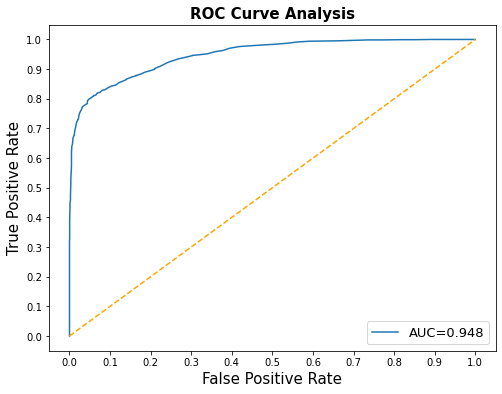

In [59]:
fig = plt.figure(figsize=(8,6))

plt.plot(fpr, tpr, label="AUC={:.3f}".format(auc))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

Not that impressive results.. Let's see the full picture:

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      2464
           1       0.92      0.78      0.84      1344

    accuracy                           0.90      3808
   macro avg       0.90      0.87      0.88      3808
weighted avg       0.90      0.90      0.90      3808

Confusion matrix
[[2374   90]
 [ 299 1045]]


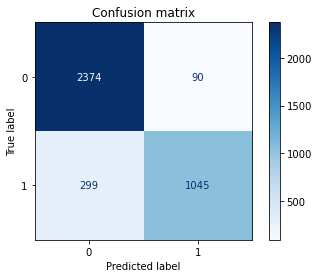

Accuracy:
0.8978466386554622


In [60]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

from sklearn.metrics import plot_confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

disp = plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
title = "Confusion matrix"
disp.ax_.set_title(title)

print(title)
print(disp.confusion_matrix)

plt.show()

from sklearn.metrics import accuracy_score
accu = accuracy_score(y_test, y_pred)
print(f"Accuracy:\n{accu}")

In [61]:
target_names = ['non-anti-vax', 'anti-vax']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

non-anti-vax       0.89      0.96      0.92      2464
    anti-vax       0.92      0.78      0.84      1344

    accuracy                           0.90      3808
   macro avg       0.90      0.87      0.88      3808
weighted avg       0.90      0.90      0.90      3808



In [62]:
y_pred_train = clf.predict(X_train)
accu_train = accuracy_score(y_train, y_pred_train)
print(f"Accuracy train:\n{accu_train}")

Accuracy train:
0.9991464775786225


# Comparison with other models

In [63]:
fpr_nofar = np.array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.05844156e-04, 4.05844156e-04, 4.05844156e-04,
       4.05844156e-04, 4.05844156e-04, 4.05844156e-04, 4.05844156e-04,
       4.05844156e-04, 4.05844156e-04, 4.05844156e-04, 8.11688312e-04,
       8.11688312e-04, 8.11688312e-04, 8.11688312e-04, 8.11688312e-04,
       8.11688312e-04, 8.11688312e-04, 8.11688312e-04, 8.11688312e-04,
       8.11688312e-04, 8.11688312e-04, 8.11688312e-04, 8.11688312e-04,
       8.11688312e-04, 8.11688312e-04, 8.11688312e-04, 8.11688312e-04,
       8.11688312e-04, 8.11688312e-04, 8.11688312e-04, 8.11688312e-04,
       8.11688312e-04, 8.11688312e-04, 8.11688312e-04, 8.11688312e-04,
       8.11688312e-04, 8.11688312e-04, 1.62337662e-03, 1.62337662e-03,
       1.62337662e-03, 1.62337662e-03, 1.62337662e-03, 1.62337662e-03,
       1.62337662e-03, 1.62337662e-03, 1.62337662e-03, 1.62337662e-03,
       1.62337662e-03, 1.62337662e-03, 2.02922078e-03, 2.02922078e-03,
       2.02922078e-03, 2.02922078e-03, 2.02922078e-03, 2.02922078e-03,
       2.02922078e-03, 2.02922078e-03, 2.02922078e-03, 2.02922078e-03,
       2.02922078e-03, 2.02922078e-03, 2.02922078e-03, 2.02922078e-03,
       2.02922078e-03, 2.02922078e-03, 2.02922078e-03, 2.02922078e-03,
       2.02922078e-03, 2.02922078e-03, 2.02922078e-03, 2.02922078e-03,
       2.02922078e-03, 2.02922078e-03, 2.02922078e-03, 2.02922078e-03,
       2.02922078e-03, 2.02922078e-03, 2.02922078e-03, 2.02922078e-03,
       2.02922078e-03, 2.43506494e-03, 2.43506494e-03, 2.43506494e-03,
       2.43506494e-03, 2.84090909e-03, 2.84090909e-03, 3.24675325e-03,
       3.24675325e-03, 3.24675325e-03, 3.24675325e-03, 3.24675325e-03,
       3.24675325e-03, 3.24675325e-03, 3.24675325e-03, 3.24675325e-03,
       3.24675325e-03, 3.24675325e-03, 3.24675325e-03, 3.24675325e-03,
       3.65259740e-03, 3.65259740e-03, 3.65259740e-03, 3.65259740e-03,
       3.65259740e-03, 3.65259740e-03, 3.65259740e-03, 3.65259740e-03,
       3.65259740e-03, 3.65259740e-03, 3.65259740e-03, 3.65259740e-03,
       3.65259740e-03, 3.65259740e-03, 3.65259740e-03, 3.65259740e-03,
       3.65259740e-03, 4.05844156e-03, 4.05844156e-03, 4.05844156e-03,
       4.05844156e-03, 4.46428571e-03, 4.46428571e-03, 4.87012987e-03,
       4.87012987e-03, 4.87012987e-03, 4.87012987e-03, 4.87012987e-03,
       4.87012987e-03, 4.87012987e-03, 4.87012987e-03, 5.27597403e-03,
       5.27597403e-03, 5.27597403e-03, 5.68181818e-03, 5.68181818e-03,
       6.49350649e-03, 6.49350649e-03, 7.30519481e-03, 7.30519481e-03,
       7.71103896e-03, 7.71103896e-03, 7.71103896e-03, 7.71103896e-03,
       8.11688312e-03, 8.11688312e-03, 8.52272727e-03, 8.52272727e-03,
       9.33441558e-03, 9.33441558e-03, 9.33441558e-03, 9.33441558e-03,
       9.74025974e-03, 9.74025974e-03, 1.01461039e-02, 1.01461039e-02,
       1.05519481e-02, 1.05519481e-02, 1.13636364e-02, 1.13636364e-02,
       1.25811688e-02, 1.25811688e-02, 1.29870130e-02, 1.29870130e-02,
       1.33928571e-02, 1.33928571e-02, 1.33928571e-02, 1.33928571e-02,
       1.37987013e-02, 1.37987013e-02, 1.37987013e-02, 1.37987013e-02,
       1.37987013e-02, 1.46103896e-02, 1.46103896e-02, 1.50162338e-02,
       1.50162338e-02, 1.54220779e-02, 1.54220779e-02, 1.62337662e-02,
       1.62337662e-02, 1.66396104e-02, 1.66396104e-02, 1.82629870e-02,
       1.82629870e-02, 1.82629870e-02, 1.86688312e-02, 1.86688312e-02,
       1.90746753e-02, 1.90746753e-02, 1.94805195e-02, 1.94805195e-02,
       1.94805195e-02, 1.94805195e-02, 1.98863636e-02, 1.98863636e-02,
       2.02922078e-02, 2.02922078e-02, 2.19155844e-02, 2.19155844e-02,
       2.19155844e-02, 2.27272727e-02, 2.27272727e-02, 2.31331169e-02,
       2.31331169e-02, 2.35389610e-02, 2.35389610e-02, 2.35389610e-02,
       2.43506494e-02, 2.43506494e-02, 2.47564935e-02, 2.47564935e-02,
       2.55681818e-02, 2.55681818e-02, 2.59740260e-02, 2.59740260e-02,
       2.59740260e-02, 2.71915584e-02, 2.71915584e-02, 2.80032468e-02,
       2.80032468e-02, 2.84090909e-02, 2.84090909e-02, 2.96266234e-02,
       2.96266234e-02, 3.04383117e-02, 3.04383117e-02, 3.08441558e-02,
       3.08441558e-02, 3.08441558e-02, 3.08441558e-02, 3.20616883e-02,
       3.20616883e-02, 3.28733766e-02, 3.28733766e-02, 3.32792208e-02,
       3.32792208e-02, 3.49025974e-02, 3.49025974e-02, 3.57142857e-02,
       3.57142857e-02, 3.65259740e-02, 3.69318182e-02, 3.69318182e-02,
       4.18019481e-02, 4.18019481e-02, 4.26136364e-02, 4.26136364e-02,
       4.30194805e-02, 4.30194805e-02, 4.38311688e-02, 4.38311688e-02,
       4.46428571e-02, 4.46428571e-02, 4.62662338e-02, 4.70779221e-02,
       4.78896104e-02, 4.78896104e-02, 4.91071429e-02, 4.91071429e-02,
       5.27597403e-02, 5.27597403e-02, 5.43831169e-02, 5.43831169e-02,
       5.56006494e-02, 5.64123377e-02, 5.80357143e-02, 5.80357143e-02,
       5.84415584e-02, 5.84415584e-02, 5.92532468e-02, 5.92532468e-02,
       6.16883117e-02, 6.16883117e-02, 6.37175325e-02, 6.45292208e-02,
       6.45292208e-02, 6.53409091e-02, 6.53409091e-02, 6.77759740e-02,
       6.77759740e-02, 7.14285714e-02, 7.14285714e-02, 7.42694805e-02,
       7.42694805e-02, 7.62987013e-02, 7.62987013e-02, 7.87337662e-02,
       7.87337662e-02, 7.91396104e-02, 7.91396104e-02, 8.03571429e-02,
       8.03571429e-02, 8.07629870e-02, 8.15746753e-02, 8.31980519e-02,
       8.31980519e-02, 8.36038961e-02, 8.36038961e-02, 8.52272727e-02,
       8.52272727e-02, 8.76623377e-02, 8.76623377e-02, 8.88798701e-02,
       8.88798701e-02, 9.37500000e-02, 9.37500000e-02, 9.53733766e-02,
       9.53733766e-02, 9.86201299e-02, 9.86201299e-02, 1.01055195e-01,
       1.01055195e-01, 1.05519481e-01, 1.05519481e-01, 1.09172078e-01,
       1.09172078e-01, 1.11607143e-01, 1.11607143e-01, 1.19724026e-01,
       1.19724026e-01, 1.21753247e-01, 1.21753247e-01, 1.24594156e-01,
       1.24594156e-01, 1.25405844e-01, 1.26217532e-01, 1.27435065e-01,
       1.27435065e-01, 1.41233766e-01, 1.41233766e-01, 1.43668831e-01,
       1.43668831e-01, 1.44886364e-01, 1.44886364e-01, 1.46509740e-01,
       1.47321429e-01, 1.50162338e-01, 1.50162338e-01, 1.52597403e-01,
       1.52597403e-01, 1.54626623e-01, 1.54626623e-01, 1.55438312e-01,
       1.55844156e-01, 1.55844156e-01, 1.58685065e-01, 1.59496753e-01,
       1.60714286e-01, 1.60714286e-01, 1.64772727e-01, 1.64772727e-01,
       1.65990260e-01, 1.65990260e-01, 1.69642857e-01, 1.69642857e-01,
       1.74918831e-01, 1.75730519e-01, 1.79788961e-01, 1.79788961e-01,
       1.87094156e-01, 1.87905844e-01, 1.95616883e-01, 1.96428571e-01,
       1.98863636e-01, 1.98863636e-01, 2.00892857e-01, 2.00892857e-01,
       2.07386364e-01, 2.07386364e-01, 2.08603896e-01, 2.09415584e-01,
       2.10227273e-01, 2.10227273e-01, 2.10227273e-01, 2.10633117e-01,
       2.10633117e-01, 2.11038961e-01, 2.12256494e-01, 2.13068182e-01,
       2.13879870e-01, 2.17126623e-01, 2.17938312e-01, 2.19561688e-01,
       2.19561688e-01, 2.19967532e-01, 2.20779221e-01, 2.22402597e-01,
       2.23214286e-01, 2.24431818e-01, 2.25243506e-01, 2.27272727e-01,
       2.27272727e-01, 2.41477273e-01, 2.41477273e-01, 2.42288961e-01,
       2.43506494e-01, 2.54870130e-01, 2.54870130e-01, 2.57711039e-01,
       2.58928571e-01, 2.61769481e-01, 2.62581169e-01, 2.63798701e-01,
       2.65422078e-01, 2.73133117e-01, 2.73944805e-01, 2.75568182e-01,
       2.77191558e-01, 2.77191558e-01, 2.84902597e-01, 2.86120130e-01,
       2.88555195e-01, 2.89366883e-01, 2.93019481e-01, 2.94237013e-01,
       2.97483766e-01, 2.98295455e-01, 3.07224026e-01, 3.08441558e-01,
       3.12905844e-01, 3.13717532e-01, 3.14935065e-01, 3.14935065e-01,
       3.15340909e-01, 3.15340909e-01, 3.16152597e-01, 3.22646104e-01,
       3.25081169e-01, 3.27516234e-01, 3.28327922e-01, 3.30357143e-01,
       3.31574675e-01, 3.33198052e-01, 3.34415584e-01, 3.38879870e-01,
       3.39691558e-01, 3.44155844e-01, 3.44967532e-01, 3.49837662e-01,
       3.50649351e-01, 3.52678571e-01, 3.53490260e-01, 3.57142857e-01,
       3.57954545e-01, 3.59577922e-01, 3.61607143e-01, 3.62012987e-01,
       3.63636364e-01, 3.64042208e-01, 3.65665584e-01, 3.70129870e-01,
       3.70941558e-01, 3.73376623e-01, 3.75811688e-01, 3.78652597e-01,
       3.79464286e-01, 3.81899351e-01, 3.82711039e-01, 3.86363636e-01,
       3.87175325e-01, 3.91233766e-01, 3.91639610e-01, 3.93262987e-01,
       3.96915584e-01, 4.00974026e-01, 4.07873377e-01, 4.08685065e-01,
       4.10714286e-01, 4.11525974e-01, 4.11931818e-01, 4.13555195e-01,
       4.14366883e-01, 4.17207792e-01, 4.19237013e-01, 4.20048701e-01,
       4.24107143e-01, 4.24918831e-01, 4.25324675e-01, 4.26136364e-01,
       4.26948052e-01, 4.28571429e-01, 4.31006494e-01, 4.31818182e-01,
       4.33847403e-01, 4.34659091e-01, 4.35470779e-01, 4.36282468e-01,
       4.39123377e-01, 4.39935065e-01, 4.40746753e-01, 4.43181818e-01,
       4.44399351e-01, 4.46022727e-01, 4.48863636e-01, 4.48863636e-01,
       4.51704545e-01, 4.54951299e-01, 4.55762987e-01, 4.56574675e-01,
       4.57386364e-01, 4.58603896e-01, 4.59415584e-01, 4.59415584e-01,
       4.60227273e-01, 4.61444805e-01, 4.62662338e-01, 4.64285714e-01,
       4.65503247e-01, 4.72402597e-01, 4.73214286e-01, 4.75243506e-01,
       4.75243506e-01, 4.75649351e-01, 4.78490260e-01, 4.87824675e-01,
       4.88636364e-01, 4.93100649e-01, 4.93912338e-01, 4.94724026e-01,
       4.95941558e-01, 4.97970779e-01, 4.99594156e-01, 5.02840909e-01,
       5.04058442e-01, 5.05681818e-01, 5.06493506e-01, 5.08928571e-01,
       5.09740260e-01, 5.13392857e-01, 5.15827922e-01, 5.16233766e-01,
       5.17045455e-01, 5.18668831e-01, 5.19480519e-01, 5.20292208e-01,
       5.21509740e-01, 5.21915584e-01, 5.22727273e-01, 5.23944805e-01,
       5.25568182e-01, 5.26785714e-01, 5.27597403e-01, 5.28814935e-01,
       5.29626623e-01, 5.32873377e-01, 5.33685065e-01, 5.34902597e-01,
       5.35714286e-01, 5.36120130e-01, 5.36931818e-01, 5.37743506e-01,
       5.39366883e-01, 5.42207792e-01, 5.43831169e-01, 5.50324675e-01,
       5.51136364e-01, 5.53571429e-01, 5.57224026e-01, 5.58441558e-01,
       5.58847403e-01, 5.59659091e-01, 5.68181818e-01, 5.69805195e-01,
       5.71428571e-01, 5.72646104e-01, 5.74675325e-01, 5.76298701e-01,
       5.76704545e-01, 5.76704545e-01, 5.80357143e-01, 5.81168831e-01,
       5.82792208e-01, 5.83603896e-01, 5.84821429e-01, 5.89285714e-01,
       5.90503247e-01, 5.91314935e-01, 5.92938312e-01, 5.93750000e-01,
       5.94967532e-01, 5.97402597e-01, 5.98214286e-01, 5.99025974e-01,
       6.00243506e-01, 6.01055195e-01, 6.03490260e-01, 6.05113636e-01,
       6.06331169e-01, 6.07548701e-01, 6.07954545e-01, 6.08766234e-01,
       6.09172078e-01, 6.09172078e-01, 6.10389610e-01, 6.12012987e-01,
       6.12824675e-01, 6.14042208e-01, 6.16071429e-01, 6.18506494e-01,
       6.19724026e-01, 6.20535714e-01, 6.22970779e-01, 6.23782468e-01,
       6.27435065e-01, 6.29058442e-01, 6.30275974e-01, 6.31087662e-01,
       6.31493506e-01, 6.33522727e-01, 6.33928571e-01, 6.35551948e-01,
       6.39204545e-01, 6.40016234e-01, 6.42045455e-01, 6.42857143e-01,
       6.43668831e-01, 6.44480519e-01, 6.46103896e-01, 6.46915584e-01,
       6.48944805e-01, 6.49756494e-01, 6.55032468e-01, 6.57061688e-01,
       6.59090909e-01, 6.60308442e-01, 6.61120130e-01, 6.61931818e-01,
       6.62743506e-01, 6.63555195e-01, 6.67613636e-01, 6.68831169e-01,
       6.70860390e-01, 6.72483766e-01, 6.73295455e-01, 6.74512987e-01,
       6.80194805e-01, 6.81818182e-01, 6.83847403e-01, 6.86688312e-01,
       6.89935065e-01, 6.90746753e-01, 6.91558442e-01, 6.92370130e-01,
       6.98051948e-01, 6.98863636e-01, 6.99675325e-01, 7.00487013e-01,
       7.02110390e-01, 7.02922078e-01, 7.05357143e-01, 7.06168831e-01,
       7.07792208e-01, 7.09415584e-01, 7.10227273e-01, 7.11444805e-01,
       7.12256494e-01, 7.13879870e-01, 7.14691558e-01, 7.15909091e-01,
       7.16720779e-01, 7.17532468e-01, 7.18344156e-01, 7.18750000e-01,
       7.19561688e-01, 7.23214286e-01, 7.25649351e-01, 7.26866883e-01,
       7.27678571e-01, 7.30113636e-01, 7.31737013e-01, 7.32954545e-01,
       7.33766234e-01, 7.35389610e-01, 7.35795455e-01, 7.36607143e-01,
       7.37418831e-01, 7.39448052e-01, 7.41071429e-01, 7.43506494e-01,
       7.44318182e-01, 7.45129870e-01, 7.45941558e-01, 7.47970779e-01,
       7.48782468e-01, 7.57305195e-01, 7.58522727e-01, 7.60551948e-01,
       7.65016234e-01, 7.65827922e-01, 7.73538961e-01, 7.74350649e-01,
       7.74756494e-01, 7.75568182e-01, 7.78003247e-01, 7.78814935e-01,
       7.79626623e-01, 7.81250000e-01, 7.89772727e-01, 7.91396104e-01,
       7.93831169e-01, 7.95048701e-01, 8.00730519e-01, 8.01948052e-01,
       8.04788961e-01, 8.05600649e-01, 8.06006494e-01, 8.07224026e-01,
       8.13717532e-01, 8.14529221e-01, 8.15746753e-01, 8.16964286e-01,
       8.17775974e-01, 8.18993506e-01, 8.21022727e-01, 8.22646104e-01,
       8.23863636e-01, 8.25892857e-01, 8.26704545e-01, 8.33603896e-01,
       8.34821429e-01, 8.38068182e-01, 8.39691558e-01, 8.42532468e-01,
       8.43344156e-01, 8.45779221e-01, 8.46590909e-01, 8.47402597e-01,
       8.49025974e-01, 8.53490260e-01, 8.54707792e-01, 8.64448052e-01,
       8.65665584e-01, 8.66071429e-01, 8.66883117e-01, 8.68100649e-01,
       8.69724026e-01, 8.70535714e-01, 8.71753247e-01, 8.73376623e-01,
       8.75000000e-01, 8.77029221e-01, 8.77840909e-01, 8.79464286e-01,
       8.82711039e-01, 8.83116883e-01, 8.85146104e-01, 8.86769481e-01,
       8.89204545e-01, 8.89610390e-01, 8.93262987e-01, 8.95292208e-01,
       8.96103896e-01, 8.96509740e-01, 8.97321429e-01, 9.01379870e-01,
       9.02191558e-01, 9.03409091e-01, 9.04626623e-01, 9.05438312e-01,
       9.06250000e-01, 9.07061688e-01, 9.07873377e-01, 9.08685065e-01,
       9.10308442e-01, 9.11525974e-01, 9.12743506e-01, 9.13555195e-01,
       9.14772727e-01, 9.15584416e-01, 9.17207792e-01, 9.18425325e-01,
       9.19237013e-01, 9.20048701e-01, 9.21672078e-01, 9.23295455e-01,
       9.25730519e-01, 9.27353896e-01, 9.31006494e-01, 9.31818182e-01,
       9.35876623e-01, 9.37905844e-01, 9.39123377e-01, 9.40746753e-01,
       9.42370130e-01, 9.43993506e-01, 9.44399351e-01, 9.45616883e-01,
       9.47240260e-01, 9.48051948e-01, 9.52922078e-01, 9.55762987e-01,
       9.57792208e-01, 9.59415584e-01, 9.63474026e-01, 9.67126623e-01,
       9.68344156e-01, 9.69155844e-01, 9.70779221e-01, 9.73214286e-01,
       9.75243506e-01, 9.76461039e-01, 9.80519481e-01, 9.80925325e-01,
       9.88636364e-01, 9.89448052e-01, 9.90259740e-01, 9.91883117e-01,
       9.92288961e-01, 9.94318182e-01, 9.95129870e-01, 9.98376623e-01,
       1.00000000e+00])
tpr_nofar = np.array([0.00000000e+00, 7.44047619e-04, 1.04166667e-02, 1.19047619e-02,
       1.71130952e-02, 1.86011905e-02, 2.00892857e-02, 2.15773810e-02,
       3.05059524e-02, 3.19940476e-02, 3.72023810e-02, 3.86904762e-02,
       5.58035714e-02, 5.80357143e-02, 5.87797619e-02, 6.10119048e-02,
       6.25000000e-02, 6.47321429e-02, 6.62202381e-02, 6.77083333e-02,
       6.99404762e-02, 7.06845238e-02, 7.36607143e-02, 8.40773810e-02,
       8.77976190e-02, 9.30059524e-02, 9.44940476e-02, 9.67261905e-02,
       1.01190476e-01, 1.01934524e-01, 1.04910714e-01, 1.06398810e-01,
       1.11607143e-01, 1.14583333e-01, 1.19791667e-01, 1.30208333e-01,
       1.31696429e-01, 1.34672619e-01, 1.40625000e-01, 1.43601190e-01,
       1.44345238e-01, 1.51785714e-01, 1.56250000e-01, 1.62202381e-01,
       1.70386905e-01, 1.72619048e-01, 1.81547619e-01, 1.94196429e-01,
       2.14285714e-01, 2.15773810e-01, 2.48511905e-01, 2.77529762e-01,
       2.78273810e-01, 2.81250000e-01, 2.92410714e-01, 2.93154762e-01,
       2.94642857e-01, 2.95386905e-01, 3.00595238e-01, 3.06547619e-01,
       3.11011905e-01, 3.16964286e-01, 3.19940476e-01, 3.22172619e-01,
       3.22916667e-01, 3.26636905e-01, 3.38541667e-01, 3.40773810e-01,
       3.42261905e-01, 3.45982143e-01, 3.48214286e-01, 3.49702381e-01,
       3.52678571e-01, 3.54166667e-01, 3.57142857e-01, 3.59375000e-01,
       3.60119048e-01, 3.61607143e-01, 3.63095238e-01, 3.69047619e-01,
       3.78720238e-01, 3.79464286e-01, 3.81696429e-01, 3.88392857e-01,
       3.91369048e-01, 3.91369048e-01, 3.97321429e-01, 4.04761905e-01,
       4.09226190e-01, 4.11458333e-01, 4.14434524e-01, 4.15922619e-01,
       4.17410714e-01, 4.18898810e-01, 4.23363095e-01, 4.24851190e-01,
       4.27827381e-01, 4.30059524e-01, 4.37500000e-01, 4.38988095e-01,
       4.39732143e-01, 4.41220238e-01, 4.63541667e-01, 4.65029762e-01,
       4.65773810e-01, 4.67261905e-01, 4.68750000e-01, 4.70238095e-01,
       4.70982143e-01, 4.73958333e-01, 4.74702381e-01, 4.76190476e-01,
       4.78422619e-01, 4.79910714e-01, 4.83630952e-01, 4.87351190e-01,
       4.88095238e-01, 4.89583333e-01, 5.03720238e-01, 5.06696429e-01,
       5.08184524e-01, 5.11160714e-01, 5.11160714e-01, 5.12648810e-01,
       5.17857143e-01, 5.20833333e-01, 5.33482143e-01, 5.37946429e-01,
       5.38690476e-01, 5.40178571e-01, 5.42410714e-01, 5.46875000e-01,
       5.53571429e-01, 5.55059524e-01, 5.55059524e-01, 5.55803571e-01,
       5.57291667e-01, 5.64732143e-01, 5.67708333e-01, 5.71428571e-01,
       5.72172619e-01, 5.73660714e-01, 5.80357143e-01, 5.82589286e-01,
       5.83333333e-01, 5.84821429e-01, 5.91517857e-01, 5.93005952e-01,
       5.96726190e-01, 5.98958333e-01, 6.00446429e-01, 6.01934524e-01,
       6.03422619e-01, 6.07886905e-01, 6.09375000e-01, 6.10863095e-01,
       6.11607143e-01, 6.13095238e-01, 6.13839286e-01, 6.15327381e-01,
       6.18303571e-01, 6.21279762e-01, 6.22767857e-01, 6.25744048e-01,
       6.29464286e-01, 6.29464286e-01, 6.31696429e-01, 6.33184524e-01,
       6.33928571e-01, 6.33928571e-01, 6.36904762e-01, 6.36904762e-01,
       6.47321429e-01, 6.49553571e-01, 6.51041667e-01, 6.53273810e-01,
       6.59226190e-01, 6.62946429e-01, 6.65178571e-01, 6.66666667e-01,
       6.67410714e-01, 6.68898810e-01, 6.74851190e-01, 6.77827381e-01,
       6.77827381e-01, 6.82291667e-01, 6.83779762e-01, 6.93452381e-01,
       6.94940476e-01, 6.97916667e-01, 6.99404762e-01, 7.03125000e-01,
       7.04613095e-01, 7.06845238e-01, 7.08333333e-01, 7.09077381e-01,
       7.12053571e-01, 7.16517857e-01, 7.18750000e-01, 7.20238095e-01,
       7.28422619e-01, 7.28422619e-01, 7.32886905e-01, 7.34375000e-01,
       7.35119048e-01, 7.35119048e-01, 7.38095238e-01, 7.38095238e-01,
       7.48511905e-01, 7.50744048e-01, 7.55208333e-01, 7.56696429e-01,
       7.76785714e-01, 7.78273810e-01, 7.84970238e-01, 7.84970238e-01,
       7.86458333e-01, 7.90178571e-01, 7.90178571e-01, 7.95386905e-01,
       7.95386905e-01, 8.00595238e-01, 8.00595238e-01, 8.02827381e-01,
       8.02827381e-01, 8.04315476e-01, 8.05803571e-01, 8.06547619e-01,
       8.06547619e-01, 8.07291667e-01, 8.07291667e-01, 8.11011905e-01,
       8.11011905e-01, 8.14732143e-01, 8.16220238e-01, 8.24404762e-01,
       8.24404762e-01, 8.31845238e-01, 8.31845238e-01, 8.32589286e-01,
       8.32589286e-01, 8.33333333e-01, 8.33333333e-01, 8.43750000e-01,
       8.43750000e-01, 8.45982143e-01, 8.45982143e-01, 8.47470238e-01,
       8.47470238e-01, 8.48214286e-01, 8.49702381e-01, 8.53422619e-01,
       8.53422619e-01, 8.54910714e-01, 8.60119048e-01, 8.61607143e-01,
       8.62351190e-01, 8.62351190e-01, 8.63839286e-01, 8.63839286e-01,
       8.65327381e-01, 8.65327381e-01, 8.69047619e-01, 8.69047619e-01,
       8.72023810e-01, 8.72023810e-01, 8.77976190e-01, 8.77976190e-01,
       8.79464286e-01, 8.84672619e-01, 8.84672619e-01, 8.85416667e-01,
       8.85416667e-01, 8.88392857e-01, 8.88392857e-01, 8.89136905e-01,
       8.90625000e-01, 8.91369048e-01, 8.91369048e-01, 8.95089286e-01,
       8.95089286e-01, 8.96577381e-01, 8.96577381e-01, 8.98065476e-01,
       9.01041667e-01, 9.01041667e-01, 9.03273810e-01, 9.03273810e-01,
       9.04017857e-01, 9.04017857e-01, 9.05505952e-01, 9.06250000e-01,
       9.06250000e-01, 9.06994048e-01, 9.06994048e-01, 9.07738095e-01,
       9.07738095e-01, 9.10714286e-01, 9.10714286e-01, 9.12202381e-01,
       9.13690476e-01, 9.13690476e-01, 9.16666667e-01, 9.16666667e-01,
       9.17410714e-01, 9.17410714e-01, 9.18898810e-01, 9.18898810e-01,
       9.20386905e-01, 9.20386905e-01, 9.21875000e-01, 9.21875000e-01,
       9.24107143e-01, 9.25595238e-01, 9.26339286e-01, 9.26339286e-01,
       9.27083333e-01, 9.27083333e-01, 9.32291667e-01, 9.32291667e-01,
       9.35267857e-01, 9.35267857e-01, 9.36755952e-01, 9.36755952e-01,
       9.37500000e-01, 9.37500000e-01, 9.37500000e-01, 9.38244048e-01,
       9.38244048e-01, 9.40476190e-01, 9.40476190e-01, 9.41220238e-01,
       9.41220238e-01, 9.43452381e-01, 9.43452381e-01, 9.44196429e-01,
       9.44196429e-01, 9.48660714e-01, 9.48660714e-01, 9.48660714e-01,
       9.48660714e-01, 9.50148810e-01, 9.50148810e-01, 9.50892857e-01,
       9.50892857e-01, 9.51636905e-01, 9.51636905e-01, 9.52380952e-01,
       9.52380952e-01, 9.52380952e-01, 9.52380952e-01, 9.53125000e-01,
       9.53125000e-01, 9.53869048e-01, 9.53869048e-01, 9.54613095e-01,
       9.54613095e-01, 9.55357143e-01, 9.55357143e-01, 9.55357143e-01,
       9.56101190e-01, 9.56101190e-01, 9.56845238e-01, 9.56845238e-01,
       9.57589286e-01, 9.57589286e-01, 9.58333333e-01, 9.58333333e-01,
       9.59077381e-01, 9.59077381e-01, 9.59821429e-01, 9.59821429e-01,
       9.60565476e-01, 9.60565476e-01, 9.61309524e-01, 9.61309524e-01,
       9.62053571e-01, 9.62053571e-01, 9.62053571e-01, 9.62053571e-01,
       9.63541667e-01, 9.63541667e-01, 9.64285714e-01, 9.64285714e-01,
       9.65029762e-01, 9.65029762e-01, 9.65773810e-01, 9.65773810e-01,
       9.66517857e-01, 9.66517857e-01, 9.67261905e-01, 9.67261905e-01,
       9.68750000e-01, 9.68750000e-01, 9.69494048e-01, 9.69494048e-01,
       9.70238095e-01, 9.70238095e-01, 9.70982143e-01, 9.70982143e-01,
       9.71726190e-01, 9.71726190e-01, 9.72470238e-01, 9.72470238e-01,
       9.73214286e-01, 9.73214286e-01, 9.73958333e-01, 9.73958333e-01,
       9.74702381e-01, 9.74702381e-01, 9.74702381e-01, 9.74702381e-01,
       9.75446429e-01, 9.75446429e-01, 9.76190476e-01, 9.76190476e-01,
       9.76934524e-01, 9.76934524e-01, 9.77678571e-01, 9.77678571e-01,
       9.77678571e-01, 9.77678571e-01, 9.79166667e-01, 9.79166667e-01,
       9.79910714e-01, 9.79910714e-01, 9.80654762e-01, 9.80654762e-01,
       9.80654762e-01, 9.81398810e-01, 9.81398810e-01, 9.81398810e-01,
       9.81398810e-01, 9.82142857e-01, 9.82142857e-01, 9.82886905e-01,
       9.82886905e-01, 9.84375000e-01, 9.84375000e-01, 9.85119048e-01,
       9.85119048e-01, 9.85119048e-01, 9.85119048e-01, 9.85863095e-01,
       9.85863095e-01, 9.85863095e-01, 9.85863095e-01, 9.85863095e-01,
       9.85863095e-01, 9.86607143e-01, 9.86607143e-01, 9.87351190e-01,
       9.87351190e-01, 9.88095238e-01, 9.88095238e-01, 9.88095238e-01,
       9.88095238e-01, 9.89583333e-01, 9.90327381e-01, 9.90327381e-01,
       9.91071429e-01, 9.91071429e-01, 9.91071429e-01, 9.91071429e-01,
       9.91071429e-01, 9.91071429e-01, 9.91071429e-01, 9.91071429e-01,
       9.91815476e-01, 9.91815476e-01, 9.91815476e-01, 9.91815476e-01,
       9.91815476e-01, 9.91815476e-01, 9.91815476e-01, 9.91815476e-01,
       9.92559524e-01, 9.92559524e-01, 9.93303571e-01, 9.93303571e-01,
       9.93303571e-01, 9.93303571e-01, 9.94047619e-01, 9.94047619e-01,
       9.94047619e-01, 9.94047619e-01, 9.94047619e-01, 9.94047619e-01,
       9.94047619e-01, 9.94047619e-01, 9.94047619e-01, 9.94047619e-01,
       9.94047619e-01, 9.94791667e-01, 9.94791667e-01, 9.94791667e-01,
       9.94791667e-01, 9.94791667e-01, 9.94791667e-01, 9.94791667e-01,
       9.94791667e-01, 9.94791667e-01, 9.94791667e-01, 9.94791667e-01,
       9.94791667e-01, 9.94791667e-01, 9.94791667e-01, 9.95535714e-01,
       9.95535714e-01, 9.96279762e-01, 9.96279762e-01, 9.96279762e-01,
       9.96279762e-01, 9.96279762e-01, 9.96279762e-01, 9.96279762e-01,
       9.96279762e-01, 9.96279762e-01, 9.96279762e-01, 9.96279762e-01,
       9.96279762e-01, 9.96279762e-01, 9.96279762e-01, 9.96279762e-01,
       9.96279762e-01, 9.96279762e-01, 9.96279762e-01, 9.96279762e-01,
       9.96279762e-01, 9.96279762e-01, 9.96279762e-01, 9.96279762e-01,
       9.96279762e-01, 9.96279762e-01, 9.96279762e-01, 9.96279762e-01,
       9.96279762e-01, 9.96279762e-01, 9.96279762e-01, 9.96279762e-01,
       9.96279762e-01, 9.96279762e-01, 9.96279762e-01, 9.96279762e-01,
       9.96279762e-01, 9.96279762e-01, 9.96279762e-01, 9.96279762e-01,
       9.96279762e-01, 9.96279762e-01, 9.96279762e-01, 9.96279762e-01,
       9.96279762e-01, 9.96279762e-01, 9.96279762e-01, 9.96279762e-01,
       9.96279762e-01, 9.96279762e-01, 9.96279762e-01, 9.96279762e-01,
       9.96279762e-01, 9.96279762e-01, 9.96279762e-01, 9.96279762e-01,
       9.96279762e-01, 9.96279762e-01, 9.96279762e-01, 9.96279762e-01,
       9.96279762e-01, 9.96279762e-01, 9.96279762e-01, 9.96279762e-01,
       9.96279762e-01, 9.96279762e-01, 9.96279762e-01, 9.96279762e-01,
       9.96279762e-01, 9.96279762e-01, 9.96279762e-01, 9.97023810e-01,
       9.97023810e-01, 9.97023810e-01, 9.97023810e-01, 9.97023810e-01,
       9.97023810e-01, 9.97023810e-01, 9.97023810e-01, 9.97767857e-01,
       9.97767857e-01, 9.97767857e-01, 9.97767857e-01, 9.97767857e-01,
       9.97767857e-01, 9.97767857e-01, 9.97767857e-01, 9.97767857e-01,
       9.98511905e-01, 9.98511905e-01, 9.98511905e-01, 9.98511905e-01,
       9.98511905e-01, 9.98511905e-01, 9.98511905e-01, 9.98511905e-01,
       9.98511905e-01, 9.98511905e-01, 9.98511905e-01, 9.98511905e-01,
       9.98511905e-01, 9.98511905e-01, 9.98511905e-01, 9.98511905e-01,
       9.98511905e-01, 9.98511905e-01, 9.98511905e-01, 9.98511905e-01,
       9.98511905e-01, 9.98511905e-01, 9.98511905e-01, 9.98511905e-01,
       9.98511905e-01, 9.98511905e-01, 9.98511905e-01, 9.98511905e-01,
       9.98511905e-01, 9.98511905e-01, 9.98511905e-01, 9.98511905e-01,
       9.98511905e-01, 9.98511905e-01, 9.98511905e-01, 9.98511905e-01,
       9.98511905e-01, 9.98511905e-01, 9.98511905e-01, 9.98511905e-01,
       9.98511905e-01, 9.98511905e-01, 9.98511905e-01, 9.98511905e-01,
       9.98511905e-01, 9.98511905e-01, 9.98511905e-01, 9.98511905e-01,
       9.98511905e-01, 9.98511905e-01, 9.98511905e-01, 9.98511905e-01,
       9.98511905e-01, 9.98511905e-01, 9.98511905e-01, 9.98511905e-01,
       9.98511905e-01, 9.99255952e-01, 9.99255952e-01, 9.99255952e-01,
       9.99255952e-01, 9.99255952e-01, 9.99255952e-01, 9.99255952e-01,
       9.99255952e-01, 9.99255952e-01, 9.99255952e-01, 9.99255952e-01,
       9.99255952e-01, 9.99255952e-01, 9.99255952e-01, 9.99255952e-01,
       9.99255952e-01, 9.99255952e-01, 9.99255952e-01, 9.99255952e-01,
       9.99255952e-01, 9.99255952e-01, 9.99255952e-01, 9.99255952e-01,
       9.99255952e-01, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00])
auc_nofar = 0.9878883904414039

In [64]:
fpr_yaniv = np.array([0.        , 0.        , 0.        , 0.00127389, 0.00127389,
       0.00254777, 0.00254777, 0.00254777, 0.00254777, 0.00382166,
       0.00382166, 0.00509554, 0.00509554, 0.00636943, 0.00636943,
       0.00636943, 0.00636943, 0.00764331, 0.00764331, 0.01019108,
       0.01019108, 0.01146497, 0.01146497, 0.01273885, 0.01273885,
       0.01528662, 0.01528662, 0.01656051, 0.01656051, 0.01783439,
       0.01783439, 0.01910828, 0.01910828, 0.02038217, 0.02038217,
       0.02292994, 0.02292994, 0.02420382, 0.02420382, 0.02547771,
       0.02547771, 0.02675159, 0.02675159, 0.0343949 , 0.0343949 ,
       0.03566879, 0.03566879, 0.03821656, 0.03821656, 0.03949045,
       0.03949045, 0.04076433, 0.04076433, 0.04458599, 0.04458599,
       0.04585987, 0.04585987, 0.04968153, 0.04968153, 0.05095541,
       0.05095541, 0.0522293 , 0.0522293 , 0.05350318, 0.05350318,
       0.05987261, 0.05987261, 0.06624204, 0.06624204, 0.07006369,
       0.07006369, 0.07388535, 0.07388535, 0.07770701, 0.07770701,
       0.08152866, 0.08152866, 0.08535032, 0.08535032, 0.09426752,
       0.09426752, 0.10063694, 0.10063694, 0.1044586 , 0.1044586 ,
       0.11719745, 0.11847134, 0.12484076, 0.12484076, 0.1388535 ,
       0.1388535 , 0.15414013, 0.15414013, 0.17452229, 0.17452229,
       0.20254777, 0.20254777, 0.22292994, 0.22292994, 0.24203822,
       0.24203822, 0.25095541, 0.25095541, 0.36178344, 0.36178344,
       0.4089172 , 0.4089172 , 0.4522293 , 0.4522293 , 0.45605096,
       0.45605096, 0.4955414 , 0.49808917, 0.54649682, 0.54904459,
       0.58471338, 0.58471338, 0.58726115, 0.61273885, 0.61528662,
       0.65477707, 0.65477707, 0.75031847, 0.7566879 , 0.89171975,
       0.89426752, 0.93121019, 0.93375796, 0.9910828 , 0.99617834,
       1.        ])
tpr_yaniv = np.array([0.        , 0.00341297, 0.02389078, 0.02730375, 0.04095563,
       0.04095563, 0.25938567, 0.2662116 , 0.29010239, 0.29010239,
       0.38225256, 0.38225256, 0.46075085, 0.46075085, 0.52559727,
       0.53242321, 0.56313993, 0.56313993, 0.57337884, 0.57337884,
       0.59726962, 0.59726962, 0.60409556, 0.60409556, 0.67235495,
       0.67235495, 0.67576792, 0.67576792, 0.6894198 , 0.6894198 ,
       0.76109215, 0.76109215, 0.77474403, 0.77474403, 0.78498294,
       0.78498294, 0.79180887, 0.79180887, 0.80887372, 0.80887372,
       0.81911263, 0.81911263, 0.82593857, 0.82593857, 0.82935154,
       0.82935154, 0.83959044, 0.83959044, 0.84300341, 0.84300341,
       0.85324232, 0.85324232, 0.8668942 , 0.8668942 , 0.87030717,
       0.87030717, 0.87372014, 0.87372014, 0.87713311, 0.87713311,
       0.88054608, 0.88054608, 0.88395904, 0.88395904, 0.89078498,
       0.89078498, 0.89419795, 0.89419795, 0.89761092, 0.89761092,
       0.90102389, 0.90102389, 0.91467577, 0.91467577, 0.91808874,
       0.91808874, 0.93174061, 0.93174061, 0.93856655, 0.93856655,
       0.94197952, 0.94197952, 0.94539249, 0.94539249, 0.94880546,
       0.94880546, 0.95221843, 0.95221843, 0.9556314 , 0.9556314 ,
       0.95904437, 0.95904437, 0.96245734, 0.96245734, 0.96587031,
       0.96587031, 0.96928328, 0.96928328, 0.97269625, 0.97269625,
       0.97610922, 0.97610922, 0.97952218, 0.97952218, 0.98293515,
       0.98293515, 0.98634812, 0.98634812, 0.98976109, 0.98976109,
       0.99317406, 0.99317406, 0.99317406, 0.99317406, 0.99317406,
       0.99317406, 0.99658703, 0.99658703, 0.99658703, 0.99658703,
       0.99658703, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        ])
auc_yaniv = 0.9706832460163908

In [65]:
fpr_neta = np.array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00108578, 0.00108578, 0.00108578,
       0.00108578, 0.00108578, 0.00108578, 0.00108578, 0.00108578,
       0.00108578, 0.00108578, 0.00108578, 0.00108578, 0.00108578,
       0.00108578, 0.00108578, 0.00108578, 0.00108578, 0.00108578,
       0.00108578, 0.00108578, 0.00108578, 0.00108578, 0.00108578,
       0.00108578, 0.00108578, 0.00108578, 0.00108578, 0.00108578,
       0.00108578, 0.00108578, 0.00108578, 0.00108578, 0.00108578,
       0.00108578, 0.00108578, 0.00108578, 0.00108578, 0.00108578,
       0.00108578, 0.00108578, 0.00108578, 0.00108578, 0.00108578,
       0.00108578, 0.00108578, 0.00108578, 0.00108578, 0.00108578,
       0.00108578, 0.00108578, 0.00108578, 0.00108578, 0.00108578,
       0.00108578, 0.00108578, 0.00108578, 0.00108578, 0.00108578,
       0.00108578, 0.00108578, 0.00108578, 0.00108578, 0.00108578,
       0.00108578, 0.00108578, 0.00108578, 0.00108578, 0.00108578,
       0.00108578, 0.00108578, 0.00108578, 0.00108578, 0.00108578,
       0.00108578, 0.00108578, 0.00108578, 0.00108578, 0.00108578,
       0.00108578, 0.00108578, 0.00108578, 0.00108578, 0.00108578,
       0.00108578, 0.00108578, 0.00108578, 0.00108578, 0.00108578,
       0.00108578, 0.00108578, 0.00108578, 0.00108578, 0.00108578,
       0.00108578, 0.00108578, 0.00108578, 0.00108578, 0.00108578,
       0.00108578, 0.00108578, 0.00108578, 0.00108578, 0.00108578,
       0.00108578, 0.00108578, 0.00108578, 0.00108578, 0.00108578,
       0.00108578, 0.00108578, 0.00108578, 0.00108578, 0.00108578,
       0.00108578, 0.00108578, 0.00108578, 0.00108578, 0.00108578,
       0.00108578, 0.00108578, 0.00108578, 0.00108578, 0.00108578,
       0.00108578, 0.00108578, 0.00108578, 0.00108578, 0.00108578,
       0.00108578, 0.00108578, 0.00108578, 0.00108578, 0.00108578,
       0.00108578, 0.00108578, 0.00217155, 0.00217155, 0.00217155,
       0.00217155, 0.00217155, 0.00217155, 0.00325733, 0.00325733,
       0.00325733, 0.00325733, 0.00325733, 0.00434311, 0.00434311,
       0.00434311, 0.00434311, 0.00434311, 0.00434311, 0.00434311,
       0.00434311, 0.00434311, 0.00434311, 0.00434311, 0.00434311,
       0.00434311, 0.00434311, 0.00434311, 0.00434311, 0.00434311,
       0.00434311, 0.00434311, 0.00542888, 0.00542888, 0.00651466,
       0.00651466, 0.00651466, 0.00651466, 0.00651466, 0.00651466,
       0.00651466, 0.00651466, 0.00651466, 0.00651466, 0.00651466,
       0.00760043, 0.00760043, 0.00868621, 0.00868621, 0.00868621,
       0.00868621, 0.00868621, 0.00868621, 0.00868621, 0.00868621,
       0.00868621, 0.00868621, 0.00977199, 0.00977199, 0.00977199,
       0.00977199, 0.00977199, 0.00977199, 0.00977199, 0.00977199,
       0.00977199, 0.00977199, 0.00977199, 0.00977199, 0.01085776,
       0.01085776, 0.01085776, 0.01085776, 0.01085776, 0.01085776,
       0.01085776, 0.01085776, 0.01194354, 0.01194354, 0.01194354,
       0.01194354, 0.01194354, 0.01194354, 0.01194354, 0.01194354,
       0.01194354, 0.01194354, 0.01194354, 0.01194354, 0.01302932,
       0.01302932, 0.01302932, 0.01411509, 0.01411509, 0.01411509,
       0.01411509, 0.01520087, 0.01520087, 0.01628664, 0.01628664,
       0.01628664, 0.01628664, 0.01737242, 0.01737242, 0.0184582 ,
       0.0184582 , 0.01954397, 0.01954397, 0.01954397, 0.01954397,
       0.01954397, 0.01954397, 0.02062975, 0.02062975, 0.02062975,
       0.02062975, 0.02062975, 0.02062975, 0.02171553, 0.02171553,
       0.0228013 , 0.0228013 , 0.0228013 , 0.0228013 , 0.0228013 ,
       0.0228013 , 0.02388708, 0.02388708, 0.02497286, 0.02497286,
       0.02605863, 0.02605863, 0.02714441, 0.02714441, 0.02823018,
       0.02823018, 0.02931596, 0.02931596, 0.03040174, 0.03040174,
       0.03040174, 0.03148751, 0.03148751, 0.03257329, 0.03257329,
       0.03257329, 0.03257329, 0.03474484, 0.03474484, 0.03583062,
       0.03583062, 0.0369164 , 0.0369164 , 0.0369164 , 0.03800217,
       0.03800217, 0.03800217, 0.03800217, 0.03908795, 0.03908795,
       0.0412595 , 0.0412595 , 0.04343105, 0.04343105, 0.04451683,
       0.04451683, 0.04451683, 0.04668838, 0.04668838, 0.04668838,
       0.04668838, 0.04885993, 0.04885993, 0.04885993, 0.04885993,
       0.04994571, 0.04994571, 0.05211726, 0.05211726, 0.05211726,
       0.05428882, 0.05428882, 0.05646037, 0.05646037, 0.05754615,
       0.05754615, 0.05863192, 0.05863192, 0.06080347, 0.06080347,
       0.06188925, 0.06188925, 0.06188925, 0.06297503, 0.06297503,
       0.06514658, 0.06514658, 0.06623236, 0.06623236, 0.06731813,
       0.06731813, 0.06948969, 0.06948969, 0.07057546, 0.07057546,
       0.07166124, 0.07166124, 0.07274701, 0.07274701, 0.07383279,
       0.07383279, 0.07600434, 0.07600434, 0.07709012, 0.07709012,
       0.0781759 , 0.0781759 , 0.07926167, 0.07926167, 0.08143322,
       0.08143322, 0.082519  , 0.082519  , 0.08469055, 0.08469055,
       0.08577633, 0.08577633, 0.08794788, 0.08794788, 0.09011944,
       0.09011944, 0.09229099, 0.09229099, 0.09337676, 0.09337676,
       0.09446254, 0.09446254, 0.09663409, 0.09663409, 0.09771987,
       0.09771987, 0.09880565, 0.09880565, 0.10314875, 0.10314875,
       0.1053203 , 0.1053203 , 0.10857763, 0.10857763, 0.10966341,
       0.10966341, 0.11074919, 0.11074919, 0.11183496, 0.11183496,
       0.11292074, 0.11292074, 0.11400651, 0.11400651, 0.11509229,
       0.11509229, 0.11617807, 0.11617807, 0.11726384, 0.11726384,
       0.1194354 , 0.1194354 , 0.12052117, 0.12160695, 0.12160695,
       0.12269273, 0.12269273, 0.1237785 , 0.1237785 , 0.12703583,
       0.12703583, 0.12920738, 0.12920738, 0.13137894, 0.13137894,
       0.13246471, 0.13463626, 0.13463626, 0.13680782, 0.13680782,
       0.13680782, 0.14115092, 0.14115092, 0.14332248, 0.14332248,
       0.14549403, 0.14549403, 0.1465798 , 0.1465798 , 0.14875136,
       0.14875136, 0.15309446, 0.15309446, 0.15418024, 0.15418024,
       0.15526602, 0.15526602, 0.15635179, 0.15635179, 0.15743757,
       0.15960912, 0.15960912, 0.16286645, 0.16286645, 0.165038  ,
       0.165038  , 0.16612378, 0.16829533, 0.17046688, 0.17046688,
       0.17480999, 0.17698154, 0.17698154, 0.17915309, 0.18023887,
       0.18023887, 0.18458198, 0.18458198, 0.18675353, 0.18675353,
       0.19001086, 0.19001086, 0.19109663, 0.19326819, 0.19326819,
       0.19543974, 0.19761129, 0.19761129, 0.19869707, 0.19869707,
       0.20086862, 0.20304017, 0.20412595, 0.20412595, 0.20738328,
       0.20738328, 0.20846906, 0.20846906, 0.21064061, 0.21281216,
       0.21281216, 0.21389794, 0.21389794, 0.21498371, 0.21715527,
       0.21715527, 0.21932682, 0.21932682, 0.22149837, 0.22366992,
       0.22366992, 0.23669924, 0.23669924, 0.23778502, 0.23778502,
       0.24104235, 0.2432139 , 0.2432139 , 0.24538545, 0.24538545,
       0.24864278, 0.24864278, 0.25081433, 0.25081433, 0.25190011,
       0.25190011, 0.25624321, 0.25624321, 0.25732899, 0.25732899,
       0.25841477, 0.25841477, 0.26492942, 0.26818675, 0.27144408,
       0.27144408, 0.27361564, 0.27361564, 0.27470141, 0.27687296,
       0.27687296, 0.28121607, 0.28121607, 0.28555917, 0.28773073,
       0.2888165 , 0.29858849, 0.30076004, 0.30618893, 0.30618893,
       0.30836048, 0.31270358, 0.31487514, 0.31813246, 0.32138979,
       0.32464712, 0.3257329 , 0.3257329 , 0.32681868, 0.32681868,
       0.33116178, 0.33876221, 0.33876221, 0.34310532, 0.34310532,
       0.34636265, 0.34636265, 0.35396308, 0.35396308, 0.35613464,
       0.35613464, 0.35830619, 0.36156352, 0.36373507, 0.36807818,
       0.37024973, 0.37024973, 0.37893594, 0.38219327, 0.38219327,
       0.38762215, 0.38762215, 0.3897937 , 0.39196526, 0.39413681,
       0.39413681, 0.39630836, 0.40065147, 0.40065147, 0.40390879,
       0.40608035, 0.40716612, 0.40716612, 0.40933768, 0.41150923,
       0.41368078, 0.41585233, 0.41585233, 0.41802389, 0.41910966,
       0.41910966, 0.42562432, 0.42562432, 0.4310532 , 0.4310532 ,
       0.43539631, 0.43756786, 0.44299674, 0.4451683 , 0.45276873,
       0.45494028, 0.45928339, 0.46145494, 0.46145494, 0.46579805,
       0.47665581, 0.47882736, 0.48208469, 0.4907709 , 0.49294245,
       0.49294245, 0.51900109, 0.52225841, 0.52660152, 0.53637351,
       0.53854506, 0.54505972, 0.54614549, 0.54831705, 0.5504886 ,
       0.5548317 , 0.55917481, 0.56786102, 0.5689468 , 0.57111835,
       0.5732899 , 0.57546145, 0.57654723, 0.57871878, 0.58631922,
       0.58740499, 0.5917481 , 0.59283388, 0.59609121, 0.60043431,
       0.60260586, 0.6102063 , 0.61129207, 0.61346363, 0.61563518,
       0.6286645 , 0.63952226, 0.64277959, 0.64386536, 0.65038002,
       0.66123779, 0.66340934, 0.66883822, 0.669924  , 0.67209555,
       0.6742671 , 0.67643865, 0.67752443, 0.68078176, 0.68512486,
       0.68838219, 0.6970684 , 0.70249729, 0.70575461, 0.71226927,
       0.71444083, 0.71878393, 0.72095548, 0.72421281, 0.72638436,
       0.72855592, 0.73072747, 0.73941368, 0.74158523, 0.74809989,
       0.75027144, 0.75570033, 0.78284473, 0.78393051, 0.78935939,
       0.79261672, 0.7937025 , 0.7980456 , 0.80130293, 0.80347448,
       0.81324647, 0.81867535, 0.82084691, 0.82519001, 0.82736156,
       0.82844734, 0.83061889, 0.83387622, 0.83713355, 0.8393051 ,
       0.84256243, 0.84799131, 0.92073833, 0.93811075, 0.94245385,
       0.94571118, 0.94788274, 0.95114007, 0.95331162, 0.95439739,
       0.95656895, 0.96091205, 0.96634093, 0.96959826, 0.97068404,
       0.97828447, 0.98914224, 0.99131379, 1.        ])
tpr_neta = np.array([0.        , 0.00227998, 0.00501596, 0.00638395, 0.00820793,
       0.00957592, 0.01048792, 0.01367989, 0.01550388, 0.01687187,
       0.01732786, 0.02827177, 0.02963976, 0.0373917 , 0.0378477 ,
       0.03921569, 0.04058368, 0.04195166, 0.04240766, 0.04331965,
       0.04696762, 0.0501596 , 0.0506156 , 0.05152759, 0.05563155,
       0.06155951, 0.0624715 , 0.06338349, 0.06383949, 0.06566347,
       0.06748746, 0.06931145, 0.06976744, 0.07159143, 0.07250342,
       0.07615139, 0.07934337, 0.08937528, 0.09028728, 0.09347925,
       0.09439124, 0.0998632 , 0.10168719, 0.10214318, 0.10396717,
       0.10715914, 0.10852713, 0.11399909, 0.11491108, 0.11947104,
       0.12038304, 0.12083903, 0.12220702, 0.12403101, 0.124943  ,
       0.12722298, 0.12813497, 0.12904697, 0.12995896, 0.13269494,
       0.13360693, 0.13862289, 0.13953488, 0.13999088, 0.14090287,
       0.15184679, 0.15275878, 0.15686275, 0.15777474, 0.16142271,
       0.1623347 , 0.1627907 , 0.16370269, 0.17191062, 0.17373461,
       0.1751026 , 0.17601459, 0.18239854, 0.18376653, 0.18650251,
       0.1874145 , 0.20337437, 0.20337437, 0.20519836, 0.20611035,
       0.20975832, 0.21067031, 0.2124943 , 0.21340629, 0.21477428,
       0.21568627, 0.23027816, 0.23119015, 0.23210214, 0.23347013,
       0.23438212, 0.24304606, 0.24395805, 0.24623803, 0.24760602,
       0.25262198, 0.25398997, 0.25718194, 0.25854993, 0.26037392,
       0.26128591, 0.26174191, 0.2626539 , 0.26356589, 0.26447788,
       0.26584587, 0.26675787, 0.26858185, 0.28180575, 0.28317373,
       0.28362973, 0.28499772, 0.28590971, 0.28818969, 0.29046968,
       0.29138167, 0.29229366, 0.29411765, 0.29457364, 0.29639763,
       0.29730962, 0.29913361, 0.3005016 , 0.30141359, 0.30962152,
       0.31053352, 0.3119015 , 0.3128135 , 0.31326949, 0.31509348,
       0.32010944, 0.32102143, 0.32421341, 0.32603739, 0.32786138,
       0.32922937, 0.32968536, 0.33059736, 0.33196534, 0.33287734,
       0.3374373 , 0.33834929, 0.33971728, 0.34062927, 0.34427725,
       0.34564523, 0.34655723, 0.35658915, 0.35750114, 0.35886913,
       0.35978112, 0.36069311, 0.3629731 , 0.36388509, 0.37118103,
       0.37209302, 0.38349293, 0.3875969 , 0.38850889, 0.3999088 ,
       0.40082079, 0.40310078, 0.40401277, 0.40857273, 0.40948472,
       0.41313269, 0.41404469, 0.41814865, 0.41906065, 0.41997264,
       0.42088463, 0.42362061, 0.4245326 , 0.42681259, 0.42818057,
       0.43137255, 0.43228454, 0.43365253, 0.43456452, 0.43866849,
       0.43958048, 0.44368445, 0.44550844, 0.45873233, 0.45964432,
       0.46511628, 0.46694026, 0.46830825, 0.46922025, 0.47241222,
       0.47332421, 0.47697218, 0.48062016, 0.48244414, 0.48335613,
       0.48609211, 0.48882809, 0.48974008, 0.49430005, 0.49931601,
       0.499772  , 0.50068399, 0.50159599, 0.50341997, 0.5129959 ,
       0.51481988, 0.51573187, 0.51709986, 0.51801186, 0.51937984,
       0.52029184, 0.52393981, 0.52393981, 0.5243958 , 0.52621979,
       0.52667579, 0.52986776, 0.53351573, 0.53351573, 0.53397173,
       0.53488372, 0.53670771, 0.5376197 , 0.5376197 , 0.53853169,
       0.54217966, 0.54400365, 0.54491564, 0.54582763, 0.54810762,
       0.5494756 , 0.55403557, 0.55494756, 0.55631555, 0.55813953,
       0.55996352, 0.56178751, 0.56634747, 0.56725946, 0.56862745,
       0.56953944, 0.57090743, 0.57090743, 0.58002736, 0.58002736,
       0.58914729, 0.59051528, 0.59917921, 0.6000912 , 0.60145919,
       0.60282718, 0.60373917, 0.60738714, 0.60829913, 0.61422709,
       0.61422709, 0.61513908, 0.61513908, 0.61696306, 0.61787506,
       0.61924305, 0.62015504, 0.62334701, 0.62425901, 0.63337893,
       0.63429093, 0.63930689, 0.63930689, 0.64341085, 0.64523484,
       0.64797082, 0.64933881, 0.65754674, 0.65937073, 0.6621067 ,
       0.6630187 , 0.66849065, 0.66940264, 0.6744186 , 0.6744186 ,
       0.6748746 , 0.67578659, 0.67624259, 0.67715458, 0.67989056,
       0.68080255, 0.68992248, 0.68992248, 0.69585043, 0.69676243,
       0.70132239, 0.70269038, 0.70405837, 0.70497036, 0.70542636,
       0.70633835, 0.71181031, 0.71363429, 0.71591427, 0.71591427,
       0.72138623, 0.72229822, 0.72229822, 0.72868217, 0.72959416,
       0.73187415, 0.73187415, 0.73369813, 0.73369813, 0.74783402,
       0.74874601, 0.749658  , 0.749658  , 0.75512996, 0.75512996,
       0.77701778, 0.77701778, 0.77792978, 0.77975376, 0.78112175,
       0.78203374, 0.78613771, 0.78613771, 0.78841769, 0.78932969,
       0.79069767, 0.79160967, 0.79890561, 0.79890561, 0.80118559,
       0.80118559, 0.80346557, 0.80437756, 0.80756954, 0.80939352,
       0.8130415 , 0.8130415 , 0.81395349, 0.81395349, 0.81577747,
       0.81623347, 0.81805746, 0.81805746, 0.81988144, 0.81988144,
       0.82261742, 0.82261742, 0.82398541, 0.82398541, 0.82717738,
       0.82808938, 0.82808938, 0.8372093 , 0.8372093 , 0.8381213 ,
       0.83903329, 0.84632923, 0.84632923, 0.84815321, 0.84815321,
       0.8504332 , 0.8504332 , 0.85134519, 0.85180119, 0.85180119,
       0.85453716, 0.85544916, 0.85590515, 0.85590515, 0.85636115,
       0.85636115, 0.86000912, 0.86000912, 0.86137711, 0.86137711,
       0.8622891 , 0.86867305, 0.86867305, 0.86958504, 0.87049704,
       0.87414501, 0.87414501, 0.87642499, 0.87733698, 0.88098495,
       0.88098495, 0.88326493, 0.88326493, 0.88417693, 0.8873689 ,
       0.8873689 , 0.88873689, 0.88873689, 0.89010488, 0.89010488,
       0.89192886, 0.89192886, 0.89238486, 0.89238486, 0.89603283,
       0.89603283, 0.89694482, 0.89785682, 0.89785682, 0.89922481,
       0.89922481, 0.9005928 , 0.9005928 , 0.90560876, 0.90560876,
       0.90834473, 0.90834473, 0.91153671, 0.91153671, 0.9124487 ,
       0.9124487 , 0.9129047 , 0.9129047 , 0.91336069, 0.91336069,
       0.91700866, 0.91700866, 0.91883265, 0.91883265, 0.92065663,
       0.92065663, 0.92202462, 0.92202462, 0.92248062, 0.92248062,
       0.92293662, 0.92293662, 0.92339261, 0.92339261, 0.9252166 ,
       0.9252166 , 0.92658459, 0.92658459, 0.92704058, 0.92704058,
       0.92749658, 0.92749658, 0.92840857, 0.92840857, 0.92886457,
       0.92886457, 0.93023256, 0.93023256, 0.93114455, 0.93114455,
       0.93160055, 0.93160055, 0.93251254, 0.93251254, 0.93296854,
       0.93296854, 0.93342453, 0.93342453, 0.93524852, 0.93524852,
       0.93616051, 0.93616051, 0.93844049, 0.93844049, 0.94026448,
       0.94026448, 0.94072047, 0.94072047, 0.94117647, 0.94117647,
       0.94208846, 0.94208846, 0.94345645, 0.94391245, 0.94436845,
       0.94436845, 0.94528044, 0.94573643, 0.94573643, 0.94664843,
       0.94664843, 0.94710442, 0.94710442, 0.94801642, 0.94801642,
       0.94847241, 0.94847241, 0.9493844 , 0.9493844 , 0.95075239,
       0.95075239, 0.95075239, 0.95212038, 0.95212038, 0.95303238,
       0.95348837, 0.95348837, 0.95440036, 0.95440036, 0.95622435,
       0.95622435, 0.95668035, 0.95668035, 0.95850433, 0.95850433,
       0.95896033, 0.95896033, 0.95941632, 0.95941632, 0.95987232,
       0.95987232, 0.96032832, 0.96032832, 0.96078431, 0.96078431,
       0.96078431, 0.96124031, 0.96124031, 0.9626083 , 0.9626083 ,
       0.96352029, 0.96352029, 0.96352029, 0.96352029, 0.96397629,
       0.96397629, 0.96397629, 0.96534428, 0.96534428, 0.96534428,
       0.96625627, 0.96625627, 0.96671227, 0.96671227, 0.96899225,
       0.96899225, 0.96944824, 0.96944824, 0.96944824, 0.97036024,
       0.97036024, 0.97036024, 0.97081623, 0.97081623, 0.97172823,
       0.97172823, 0.97172823, 0.97172823, 0.97264022, 0.97264022,
       0.97309622, 0.97309622, 0.97355221, 0.97355221, 0.97355221,
       0.97400821, 0.97400821, 0.9753762 , 0.9753762 , 0.9753762 ,
       0.97583219, 0.97583219, 0.97720018, 0.97720018, 0.97720018,
       0.97811218, 0.97811218, 0.97856817, 0.97856817, 0.97902417,
       0.97902417, 0.97902417, 0.97948016, 0.97948016, 0.97993616,
       0.97993616, 0.98084815, 0.98084815, 0.98130415, 0.98130415,
       0.98176015, 0.98176015, 0.98221614, 0.98221614, 0.98267214,
       0.98267214, 0.98404013, 0.98404013, 0.98404013, 0.98404013,
       0.98540812, 0.98540812, 0.98586411, 0.98586411, 0.98586411,
       0.9872321 , 0.9872321 , 0.9876881 , 0.9876881 , 0.9876881 ,
       0.98860009, 0.98860009, 0.98860009, 0.98860009, 0.98905609,
       0.98905609, 0.98905609, 0.98905609, 0.98905609, 0.98905609,
       0.98905609, 0.98905609, 0.98951208, 0.98951208, 0.98996808,
       0.98996808, 0.98996808, 0.99088007, 0.99088007, 0.99133607,
       0.99133607, 0.99179207, 0.99179207, 0.99224806, 0.99224806,
       0.99270406, 0.99270406, 0.99270406, 0.99270406, 0.99270406,
       0.99270406, 0.99316005, 0.99316005, 0.99316005, 0.99361605,
       0.99361605, 0.99498404, 0.99498404, 0.99498404, 0.99498404,
       0.99544004, 0.99544004, 0.99544004, 0.99589603, 0.99589603,
       0.99589603, 0.99589603, 0.99635203, 0.99635203, 0.99635203,
       0.99635203, 0.99635203, 0.99726402, 0.99726402, 0.99726402,
       0.99817601, 0.99817601, 0.99863201, 0.99863201, 0.99908801,
       0.99908801, 0.99908801, 0.99908801, 0.99908801, 0.99908801,
       0.99908801, 0.99908801, 0.99908801, 0.999544  , 0.999544  ,
       0.999544  , 0.999544  , 0.999544  , 0.999544  , 0.999544  ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        ])

auc_neta = 0.9762592257568128

In [66]:
fpr_base = np.array([0.        , 0.00111235, 0.00556174, 0.00556174, 0.00556174,
       0.00556174, 0.00556174, 0.00556174, 0.00556174, 0.00556174,
       0.00778643, 0.00778643, 0.00778643, 0.00778643, 0.00778643,
       0.00778643, 0.00778643, 0.00778643, 0.00778643, 0.00778643,
       0.00778643, 0.00778643, 0.00778643, 0.00778643, 0.00778643,
       0.00778643, 0.00778643, 0.00778643, 0.00778643, 0.00778643,
       0.00778643, 0.00778643, 0.00778643, 0.00889878, 0.00889878,
       0.00889878, 0.00889878, 0.00889878, 0.00889878, 0.01001112,
       0.01001112, 0.02113459, 0.02113459, 0.02335929, 0.02335929,
       0.02335929, 0.02447164, 0.02447164, 0.02558398, 0.02558398,
       0.02780868, 0.02780868, 0.02892102, 0.02892102, 0.03003337,
       0.03003337, 0.03337041, 0.03337041, 0.0378198 , 0.0378198 ,
       0.04004449, 0.04004449, 0.04004449, 0.04115684, 0.04115684,
       0.04449388, 0.04449388, 0.04560623, 0.04560623, 0.04783092,
       0.04783092, 0.04894327, 0.04894327, 0.05116796, 0.05116796,
       0.05228031, 0.05339266, 0.05561735, 0.05561735, 0.05561735,
       0.0567297 , 0.0567297 , 0.05784205, 0.05784205, 0.06006674,
       0.06006674, 0.06229143, 0.06229143, 0.06229143, 0.06451613,
       0.06451613, 0.06451613, 0.06562848, 0.06562848, 0.06785317,
       0.06785317, 0.06785317, 0.06896552, 0.06896552, 0.07119021,
       0.07119021, 0.07230256, 0.07230256, 0.07341491, 0.07341491,
       0.07341491, 0.07452725, 0.07452725, 0.07675195, 0.07675195,
       0.07675195, 0.07786429, 0.07786429, 0.08008899, 0.08008899,
       0.08120133, 0.08120133, 0.08231368, 0.08231368, 0.09232481,
       0.09232481, 0.0945495 , 0.0945495 , 0.09566185, 0.09566185,
       0.09788654, 0.09788654, 0.09899889, 0.09899889, 0.09899889,
       0.09899889, 0.10011123, 0.10011123, 0.10122358, 0.10122358,
       0.10233593, 0.10233593, 0.10456062, 0.10456062, 0.10456062,
       0.10456062, 0.10456062, 0.10456062, 0.10456062, 0.10456062,
       0.10456062, 0.10456062, 0.10456062, 0.10456062, 0.10456062,
       0.10456062, 0.10456062, 0.10456062, 0.10456062, 0.10456062,
       0.10456062, 0.10456062, 0.10456062, 0.10456062, 0.10456062,
       0.10456062, 0.10456062, 0.10456062, 0.10456062, 0.10456062,
       0.10456062, 0.10456062, 0.10456062, 0.10456062, 0.10456062,
       0.10456062, 0.10456062, 0.10456062, 0.10456062, 0.10456062,
       0.10456062, 0.10456062, 0.14238042, 0.14238042, 0.14794216,
       0.14794216, 0.14794216, 0.14794216, 0.14794216, 0.14794216,
       0.14794216, 0.14794216, 0.14794216, 0.14794216, 0.14794216,
       0.14794216, 0.14794216, 0.14794216, 0.14794216, 0.14794216,
       0.14794216, 0.14794216, 0.14794216, 0.14794216, 0.15239155,
       0.15239155, 0.15239155, 0.15239155, 0.15239155, 0.15239155,
       0.15350389, 0.15350389, 0.15350389, 0.16462736, 0.16462736,
       0.17463849, 0.17463849, 0.20022247, 0.20022247, 0.21802002,
       0.21802002, 0.21913237, 0.21913237, 0.22024472, 0.22024472,
       0.22135706, 0.22358176, 0.23136819, 0.23136819, 0.23359288,
       0.23359288, 0.23581758, 0.23581758, 0.23804227, 0.23804227,
       0.23915462, 0.23915462, 0.243604  , 0.243604  , 0.24471635,
       0.24471635, 0.24694105, 0.24694105, 0.25027809, 0.25027809,
       0.25139043, 0.25139043, 0.25250278, 0.25250278, 0.25361513,
       0.25361513, 0.25695217, 0.25695217, 0.26140156, 0.26140156,
       0.26362625, 0.26362625, 0.2647386 , 0.2647386 , 0.26585095,
       0.26585095, 0.26585095, 0.26585095, 0.26807564, 0.26807564,
       0.26807564, 0.27141268, 0.27141268, 0.27252503, 0.27252503,
       0.27697442, 0.27697442, 0.27919911, 0.27919911, 0.28031146,
       0.28031146, 0.28031146, 0.28698554, 0.28698554, 0.29254727,
       0.29254727, 0.29810901, 0.3003337 , 0.30144605, 0.30144605,
       0.30589544, 0.30589544, 0.30812013, 0.30812013, 0.31034483,
       0.31034483, 0.31368187, 0.31368187, 0.31813126, 0.31813126,
       0.32480534, 0.32480534, 0.33926585, 0.34149055, 0.34260289,
       0.34260289, 0.34593993, 0.34593993, 0.36151279, 0.36151279,
       0.36373749, 0.36373749, 0.37041157, 0.37263626, 0.37374861,
       0.37374861, 0.37486096, 0.37708565, 0.37931034, 0.38042269,
       0.38264739, 0.38264739, 0.38264739, 0.39154616, 0.39154616,
       0.3948832 , 0.3948832 , 0.40378198, 0.40711902, 0.40934372,
       0.40934372, 0.4137931 , 0.4137931 , 0.42380423, 0.42380423,
       0.42602892, 0.42602892, 0.42602892, 0.42714127, 0.42936596,
       0.43047831, 0.43047831, 0.43047831, 0.43159066, 0.43159066,
       0.43381535, 0.43381535, 0.43604004, 0.43604004, 0.44271413,
       0.44271413, 0.44271413, 0.44493882, 0.44493882, 0.44716352,
       0.44827586, 0.44827586, 0.44938821, 0.44938821, 0.44938821,
       0.4516129 , 0.4516129 , 0.45606229, 0.45717464, 0.45717464,
       0.45939933, 0.45939933, 0.46496107, 0.46607341, 0.46607341,
       0.46718576, 0.46718576, 0.46829811, 0.46829811, 0.4727475 ,
       0.47385984, 0.47497219, 0.47497219, 0.47942158, 0.47942158,
       0.48053393, 0.48053393, 0.48275862, 0.48275862, 0.48387097,
       0.48387097, 0.49499444, 0.49499444, 0.49833148, 0.49833148,
       0.49833148, 0.50055617, 0.50055617, 0.50611791, 0.50611791,
       0.50723026, 0.50723026, 0.52502781, 0.52502781, 0.52836485,
       0.53503893, 0.53615128, 0.53615128, 0.53837597, 0.53837597,
       0.53948832, 0.53948832, 0.54393771, 0.54393771, 0.5461624 ,
       0.55172414, 0.55728587, 0.55728587, 0.55951057, 0.55951057,
       0.56840934, 0.56840934, 0.57063404, 0.57063404, 0.57174638,
       0.57174638, 0.57285873, 0.57285873, 0.57508343, 0.57508343,
       0.58064516, 0.58064516, 0.58175751, 0.58175751, 0.58286986,
       0.58286986, 0.5839822 , 0.5839822 , 0.58954394, 0.58954394,
       0.59176863, 0.59176863, 0.59399333, 0.59399333, 0.59955506,
       0.59955506, 0.60066741, 0.60066741, 0.6028921 , 0.6028921 ,
       0.6051168 , 0.6051168 , 0.60734149, 0.60734149, 0.60734149,
       0.60845384, 0.60845384, 0.61624027, 0.61624027, 0.61735261,
       0.61735261, 0.62513904, 0.62513904, 0.63403782, 0.63403782,
       0.63515017, 0.63515017, 0.63848721, 0.63848721, 0.6407119 ,
       0.6407119 , 0.6407119 , 0.64182425, 0.64182425, 0.65183537,
       0.65183537, 0.66295884, 0.66295884, 0.67741935, 0.67741935,
       0.68520578, 0.68520578, 0.68631813, 0.68631813, 0.69299221,
       0.69299221, 0.69299221, 0.69632925, 0.69632925, 0.70077864,
       0.70077864, 0.70634038, 0.70634038, 0.7163515 , 0.7163515 ,
       0.72413793, 0.72413793, 0.72413793, 0.73414905, 0.73414905,
       0.73637375, 0.73637375, 0.77641824, 0.77641824, 0.78531702,
       0.78531702, 0.78865406, 0.78865406, 0.78865406, 0.79087875,
       0.79087875, 0.7942158 , 0.7942158 , 0.79977753, 0.79977753,
       0.81423804, 0.81423804, 0.81423804, 0.81423804, 0.81535039,
       0.81535039, 0.81757508, 0.81979978, 0.81979978, 0.82424917,
       0.82424917, 0.82647386, 0.82647386, 0.82758621, 0.8298109 ,
       0.8298109 , 0.8298109 , 0.8320356 , 0.8320356 , 0.83537264,
       0.83537264, 0.84093437, 0.84093437, 0.84204672, 0.84204672,
       0.84427141, 0.84427141, 0.84760845, 0.85650723, 0.85650723,
       0.85761958, 0.85761958, 0.85984427, 0.85984427, 0.86206897,
       0.86206897, 0.86318131, 0.87096774, 0.87096774, 0.87430478,
       0.87430478, 0.87430478, 0.88876529, 0.88876529, 0.88987764,
       0.88987764, 0.89432703, 0.89432703, 0.89988877, 0.89988877,
       0.90767519, 0.90767519, 0.91101224, 0.91101224, 0.91323693,
       0.91546162, 0.91546162, 0.91879867, 0.91879867, 0.92102336,
       0.92102336, 0.92324805, 0.92324805, 0.92547275, 0.92547275,
       0.92547275, 0.92880979, 0.92880979, 0.93103448, 0.93103448,
       0.93659622, 0.93659622, 0.93993326, 0.93993326, 0.94104561,
       0.94104561, 0.94660734, 0.94660734, 0.9621802 , 0.9621802 ,
       0.97441602, 0.97441602, 0.98331479, 0.98331479, 0.98331479,
       0.98887653, 0.98887653, 0.99888765, 0.99888765, 1.        ])
tpr_base = np.array([0.        , 0.        , 0.        , 0.00876095, 0.01126408,
       0.01376721, 0.01627034, 0.02753442, 0.03003755, 0.04130163,
       0.04130163, 0.04255319, 0.04505632, 0.05006258, 0.05256571,
       0.05381727, 0.05757196, 0.06132666, 0.06633292, 0.07008761,
       0.07259074, 0.077597  , 0.08010013, 0.08260325, 0.08510638,
       0.08886108, 0.09136421, 0.09261577, 0.09762203, 0.09887359,
       0.10137672, 0.10387985, 0.10638298, 0.10638298, 0.10763454,
       0.11013767, 0.1126408 , 0.11514393, 0.11639549, 0.11639549,
       0.11889862, 0.11889862, 0.12015019, 0.12015019, 0.12891114,
       0.13141427, 0.13141427, 0.13642053, 0.13642053, 0.14017522,
       0.14017522, 0.14768461, 0.14768461, 0.1514393 , 0.1514393 ,
       0.15269086, 0.15269086, 0.15644556, 0.15644556, 0.15894869,
       0.15894869, 0.16145181, 0.16395494, 0.16395494, 0.16770964,
       0.16770964, 0.17021277, 0.17021277, 0.17271589, 0.17271589,
       0.17647059, 0.17647059, 0.18022528, 0.18022528, 0.18272841,
       0.18272841, 0.18397997, 0.18397997, 0.1864831 , 0.19148936,
       0.19148936, 0.19274093, 0.19274093, 0.19774718, 0.19774718,
       0.20150188, 0.20150188, 0.20400501, 0.20525657, 0.20525657,
       0.20650814, 0.21151439, 0.21151439, 0.21276596, 0.21276596,
       0.21526909, 0.21652065, 0.21652065, 0.21902378, 0.21902378,
       0.22403004, 0.2252816 , 0.22653317, 0.22653317, 0.22778473,
       0.23153942, 0.23153942, 0.23779725, 0.23779725, 0.23904881,
       0.2428035 , 0.2428035 , 0.24530663, 0.24530663, 0.24906133,
       0.24906133, 0.25031289, 0.25031289, 0.25156446, 0.25156446,
       0.25281602, 0.25281602, 0.25531915, 0.25531915, 0.25657071,
       0.25657071, 0.25782228, 0.25782228, 0.25907384, 0.26157697,
       0.26282854, 0.26282854, 0.26533166, 0.26533166, 0.26658323,
       0.26658323, 0.26908636, 0.26908636, 0.27033792, 0.27284105,
       0.27659574, 0.28035044, 0.29662078, 0.2991239 , 0.32540676,
       0.32790989, 0.33416771, 0.3379224 , 0.33917397, 0.34292866,
       0.34418023, 0.34668335, 0.35043805, 0.35294118, 0.36795995,
       0.37046308, 0.37797247, 0.38047559, 0.38297872, 0.38548185,
       0.42803504, 0.43053817, 0.43929912, 0.44180225, 0.4505632 ,
       0.45306633, 0.46057572, 0.46307885, 0.47684606, 0.47934919,
       0.48310388, 0.48560701, 0.48811014, 0.49061327, 0.49436796,
       0.49687109, 0.5068836 , 0.5068836 , 0.50813517, 0.50813517,
       0.50938673, 0.51188986, 0.51689612, 0.51939925, 0.5281602 ,
       0.53316646, 0.53817272, 0.54067584, 0.54192741, 0.54443054,
       0.55944931, 0.56445557, 0.5669587 , 0.56946183, 0.57071339,
       0.57321652, 0.57697121, 0.57947434, 0.58573217, 0.58573217,
       0.59324155, 0.59699625, 0.60075094, 0.60325407, 0.60700876,
       0.60700876, 0.60951189, 0.62202753, 0.62202753, 0.6232791 ,
       0.6232791 , 0.62578223, 0.62578223, 0.62828536, 0.62828536,
       0.62953692, 0.62953692, 0.63078849, 0.63078849, 0.63204005,
       0.63204005, 0.63204005, 0.63204005, 0.63704631, 0.63704631,
       0.640801  , 0.640801  , 0.64455569, 0.64455569, 0.64580726,
       0.64580726, 0.64705882, 0.64705882, 0.64831039, 0.64831039,
       0.65206508, 0.65206508, 0.65331665, 0.65331665, 0.65581977,
       0.65581977, 0.6583229 , 0.6583229 , 0.65957447, 0.65957447,
       0.66082603, 0.66082603, 0.66332916, 0.66332916, 0.66458073,
       0.66458073, 0.66583229, 0.66583229, 0.66833542, 0.66833542,
       0.67209011, 0.67459324, 0.67709637, 0.67709637, 0.6795995 ,
       0.68085106, 0.68085106, 0.68210263, 0.68210263, 0.68585732,
       0.68585732, 0.69086358, 0.69086358, 0.69211514, 0.69211514,
       0.6971214 , 0.69962453, 0.69962453, 0.7008761 , 0.7008761 ,
       0.70337922, 0.70337922, 0.70337922, 0.70337922, 0.70588235,
       0.70588235, 0.70713392, 0.70713392, 0.70963705, 0.70963705,
       0.71088861, 0.71088861, 0.71339174, 0.71339174, 0.7146433 ,
       0.7146433 , 0.71589487, 0.71589487, 0.71589487, 0.71589487,
       0.71714643, 0.71714643, 0.718398  , 0.718398  , 0.71964956,
       0.71964956, 0.72090113, 0.72090113, 0.72090113, 0.72090113,
       0.72215269, 0.72215269, 0.72215269, 0.72215269, 0.72340426,
       0.72340426, 0.72465582, 0.72715895, 0.72715895, 0.72966208,
       0.72966208, 0.73216521, 0.73216521, 0.73216521, 0.73216521,
       0.73341677, 0.73341677, 0.7359199 , 0.7359199 , 0.73717146,
       0.73717146, 0.73842303, 0.74092616, 0.74092616, 0.74092616,
       0.74092616, 0.74342929, 0.74468085, 0.74468085, 0.74593242,
       0.74593242, 0.74718398, 0.74718398, 0.74843554, 0.74843554,
       0.75093867, 0.75219024, 0.75219024, 0.75469337, 0.75594493,
       0.75594493, 0.75844806, 0.75844806, 0.76095119, 0.76220275,
       0.76220275, 0.76470588, 0.76470588, 0.76470588, 0.76846058,
       0.76846058, 0.7709637 , 0.7709637 , 0.77221527, 0.7747184 ,
       0.7747184 , 0.77722153, 0.77722153, 0.77847309, 0.77847309,
       0.77972466, 0.77972466, 0.78222778, 0.78222778, 0.78347935,
       0.78347935, 0.78598248, 0.78598248, 0.78723404, 0.78723404,
       0.78973717, 0.78973717, 0.79098874, 0.79098874, 0.79599499,
       0.79724656, 0.79724656, 0.79849812, 0.79849812, 0.79974969,
       0.79974969, 0.80100125, 0.80100125, 0.80475594, 0.80475594,
       0.80475594, 0.80475594, 0.80600751, 0.80600751, 0.80725907,
       0.80725907, 0.8097622 , 0.8097622 , 0.81101377, 0.81101377,
       0.81101377, 0.81101377, 0.81226533, 0.81226533, 0.8135169 ,
       0.8135169 , 0.81602003, 0.81602003, 0.81727159, 0.81727159,
       0.81977472, 0.81977472, 0.82227785, 0.82227785, 0.82352941,
       0.82352941, 0.82478098, 0.82478098, 0.82603254, 0.82603254,
       0.82728411, 0.82728411, 0.82978723, 0.82978723, 0.8310388 ,
       0.8310388 , 0.83229036, 0.83229036, 0.83354193, 0.83354193,
       0.83479349, 0.83479349, 0.83604506, 0.83604506, 0.83729662,
       0.83729662, 0.83854819, 0.83854819, 0.83979975, 0.84230288,
       0.84230288, 0.84355444, 0.84355444, 0.84480601, 0.84480601,
       0.84730914, 0.84730914, 0.84981227, 0.84981227, 0.85106383,
       0.85106383, 0.85231539, 0.85231539, 0.85356696, 0.85356696,
       0.85481852, 0.85732165, 0.85732165, 0.85982478, 0.85982478,
       0.86232791, 0.86232791, 0.86483104, 0.86483104, 0.8660826 ,
       0.8660826 , 0.86858573, 0.86858573, 0.8698373 , 0.8698373 ,
       0.87234043, 0.87359199, 0.87359199, 0.87484355, 0.87484355,
       0.87609512, 0.87609512, 0.87859825, 0.87859825, 0.87984981,
       0.87984981, 0.88235294, 0.89236546, 0.89236546, 0.89486859,
       0.89486859, 0.89612015, 0.89612015, 0.89862328, 0.89862328,
       0.89987484, 0.89987484, 0.90237797, 0.90362954, 0.90362954,
       0.9048811 , 0.9048811 , 0.90613267, 0.90613267, 0.90863579,
       0.90863579, 0.90988736, 0.91239049, 0.91364205, 0.91364205,
       0.91489362, 0.91489362, 0.91489362, 0.91614518, 0.91614518,
       0.91864831, 0.91864831, 0.91989987, 0.91989987, 0.91989987,
       0.922403  , 0.92365457, 0.92365457, 0.92490613, 0.92490613,
       0.92740926, 0.92740926, 0.92866083, 0.92866083, 0.93491865,
       0.93491865, 0.93742178, 0.93742178, 0.93742178, 0.93867334,
       0.93867334, 0.94117647, 0.94117647, 0.94242804, 0.94242804,
       0.94618273, 0.94743429, 0.94743429, 0.94868586, 0.94868586,
       0.95118899, 0.95244055, 0.95244055, 0.95369212, 0.95369212,
       0.95619524, 0.95619524, 0.95744681, 0.95744681, 0.9612015 ,
       0.9612015 , 0.96245307, 0.96245307, 0.9649562 , 0.9649562 ,
       0.9649562 , 0.96620776, 0.96620776, 0.96871089, 0.96871089,
       0.96996245, 0.96996245, 0.97246558, 0.97246558, 0.97496871,
       0.97747184, 0.97747184, 0.97997497, 0.97997497, 0.9824781 ,
       0.9824781 , 0.98372966, 0.98372966, 0.98498123, 0.98498123,
       0.98623279, 0.98623279, 0.98873592, 0.98873592, 0.99123905,
       0.99123905, 0.99249061, 0.99249061, 0.99499374, 0.99624531,
       0.99624531, 0.99749687, 0.99749687, 1.        , 1.        ])
auc_base = 0.7011614907956414

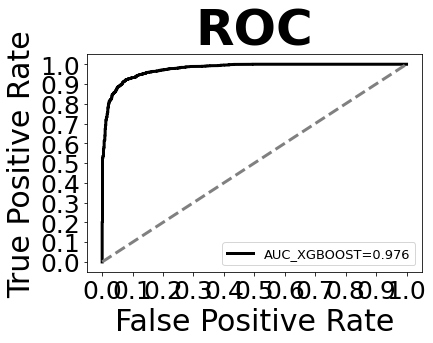

In [67]:
ax = plt.gca()
plt.plot(fpr_neta, tpr_neta, label="AUC_XGBOOST={:.3f}".format(auc_neta), color='black', lw=3)
#ax.set_facecolor('#1d9bf1')
plt.plot([0,1], [0,1], color='gray', linestyle='--', lw=3)
plt.xticks(np.arange(0.0, 1.1, step=0.1), fontsize=25)
plt.xlabel("False Positive Rate", fontsize=30)
plt.yticks(np.arange(0.0, 1.1, step=0.1), fontsize=25)
plt.ylabel("True Positive Rate", fontsize=30)
plt.title('ROC', fontweight='bold', fontsize=50)
plt.legend(prop={'size':13}, loc='lower right')

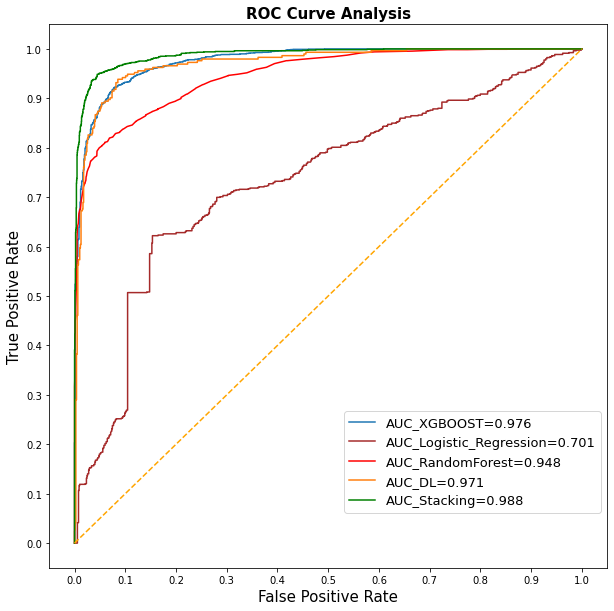

In [71]:
import matplotlib.pyplot as plt

plt.plot(fpr_neta, tpr_neta, label="AUC_XGBOOST={:.3f}".format(auc_neta))
plt.plot(fpr_base, tpr_base, label="AUC_Logistic_Regression={:.3f}".format(auc_base), color='brown')

plt.plot(fpr, tpr, label="AUC_RandomForest={:.3f}".format(auc), color='red')
plt.plot(fpr_yaniv, tpr_yaniv, label="AUC_DL={:.3f}".format(auc_yaniv))

plt.plot(fpr_nofar, tpr_nofar, label="AUC_Stacking={:.3f}".format(auc_nofar), color='green')
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13},  loc='best', bbox_to_anchor=(1, 0.3))

plt.rcParams["figure.figsize"] = (10,10)


plt.show()

In [69]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print(f"{f + 1}. feature: {train_df.columns[indices[f]]} ({importances[indices[f]]})")

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

Feature ranking:
1. feature: retweets (0.22314423311472092)
2. feature: user_followers (0.1645652732965112)
3. feature: tweet_len (0.1397422784906198)
4. feature: Year user created (0.12329770964679415)
5. feature: Day_of_week (0.09172187725204761)
6. feature: tweet_special chars (0.09022759341289475)
7. feature: category (0.08832210118553799)
8. feature: favorites (0.04599763601445564)
9. feature: desc_special chars (0.017925353400439117)
10. feature: is_retweet (0.01505594418597889)


IndexError: index 10 is out of bounds for axis 0 with size 10